In [1]:
import sys
sys.path.append('../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import pandas as pd
import pickle
import functions_load_stf
import functions_end_stf

In [3]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined_scardec_ye_usgs_sigloch_isc_mag.csv')

In [4]:
combined.columns = ['event', 'scardec', 'ye', 'isc', 'sigloch', 'usgs', 'mag']

In [5]:
def plot_stf(ax, time, momentrate, detected_end_time, linecolor = 'k', linestyle = '--', label_str = '', plot_bar = True):
    ax.plot(time, momentrate, color=linecolor, label = label_str + ' STF' )
    if plot_bar is True:
        ax.axhline(max(momentrate)/10, color='#ffa600')
        ax.fill_between(time, 0, 10*max(momentrate)/100, facecolor='#ffa600', alpha=0.1)

    ax.fill_between(time, momentrate, 0, where=momentrate>0, facecolor=linecolor, alpha=0.05)

    # ax.axvline(detected_end_time, color=linecolor, linestyle=linestyle, label = label_str + ' (3) end')

    ax.set_ylim(0, 1.1*max(momentrate))
    ax.set_xlim(0, max(time))

    ax.legend()

    return ax


In [6]:
def end_plot(ax, momentrate, time, threshold=0.5, max_end = 0, y_max = 0, count = 0, lines_count = 0, calc_ends_different = False):
	detected_end_time, detected_end, detected_start_time, detected_start = functions_end_stf.find_end_stf(momentrate, time, threshold = threshold)
	time = time - detected_start_time # shift to start STF at zero
	detected_end_time = detected_end_time - detected_start_time
	ax = plot_stf(ax, time, momentrate, detected_end_time, colors[lines_count], '--', label_str = 'SCARDEC Average', plot_bar = False)
	detected_zero_end_time, detected_zero_end, detected_zero_start_time, detected_zero_start = functions_end_stf.find_zero_end_stf(momentrate, time)
	ax.axvline(detected_zero_end_time, color=colors[lines_count], linestyle=':', label = 'SCARDEC Average (1) end', linewidth = 2)
	detected_99_end_time, detected_99_end, detected_99_start_time, detected_99_start = functions_end_stf.find_99_end_stf(momentrate, time)
	ax.axvline(detected_99_end_time, color=colors[lines_count], linestyle='-.', label = 'SCARDEC Average (2) end', linewidth = 2)
	ax.axvline(detected_end_time, color=colors[lines_count], linestyle='--', label = 'SCARDEC Average (3) end', linewidth = 2)
	max_end = max(max_end, max(time))
	y_max = max(y_max, max(momentrate))
	if calc_ends_different is True:
		if 0.9 * detected_99_end_time < detected_end_time < 1.1 * detected_99_end_time:
			return ax, max_end, y_max, True
		else:
			return ax, max_end, y_max, False
	else:
		return ax, max_end, y_max

In [10]:
def end_plot_norm(ax, momentrate, time, name = '', threshold=0.5, max_end = 0, y_max = 0, count = 0, lines_count = 0, calc_ends_different = False):
	detected_end_time, detected_end, detected_start_time, detected_start = functions_end_stf.find_end_stf(momentrate, time, threshold = threshold)
	time = time - detected_start_time # shift to start STF at zero
	detected_end_time = detected_end_time - detected_start_time
	ax = plot_stf(ax, time, momentrate/max(momentrate), detected_end_time, colors[lines_count], '--', label_str = f'{name}', plot_bar = False)
	detected_zero_end_time, detected_zero_end, detected_zero_start_time, detected_zero_start = functions_end_stf.find_zero_end_stf(momentrate, time)
	ax.axvline(detected_zero_end_time, color=colors[lines_count], linestyle=':', label = f'{name} (1) end', linewidth = 2)
	detected_99_end_time, detected_99_end, detected_99_start_time, detected_99_start = functions_end_stf.find_99_end_stf(momentrate, time)
	ax.axvline(detected_99_end_time, color=colors[lines_count], linestyle='-.', label = f'{name} (2) end', linewidth = 2)
	ax.axvline(detected_end_time, color=colors[lines_count], linestyle='--', label = f'{name} (3) end', linewidth = 2)
	max_end = max(max_end, max(time))
	y_max = max(y_max, max(momentrate))
	if calc_ends_different is True:
		if 0.9 * detected_99_end_time < detected_end_time < 1.1 * detected_99_end_time:
			return ax, max_end, y_max, True
		else:
			return ax, max_end, y_max, False
	else:
		return ax, max_end, y_max

In [ ]:
colors = ['#003f5c', '#bc5090', '#ef5675', 'g', 'c', 'm', 'k', 'y']
styles = ['--', '-.', ':', '--', '-.', ':', '--', '-.']
eventcount = 0
already_made = os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/figures/ends/all_on_one/both/')
for i, row in combined.iterrows():

    if i > 100:
        continue

    lines_count = 0
    count = 0
    print(row)
    sources = 0
    for r in row[1:-1]:
        if r not in [0, '0']:
            sources += 1

    max_end = 0
    y_max = 0
    max_end = 0

    fig, axs = plt.subplots(1, 1, figsize=(10, 5))
    axs = [axs]

    ends_different = False
    count_datasets = 0

    threshold = 0.5
    
    if row.scardec not in ['0', 0]:
        momentrate, time = functions_load_stf.get_scardec_stf(row['scardec'], wanted_type = 'fctmoy')
        axs[count], max_end, y_max, ends_different_calc = end_plot(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1

        axs[count], max_end, y_max = end_plot(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        if ends_different_calc is True:
            ends_different = True
        count_datasets += 1
    if row.ye not in ['0', 0]:
        momentrate, time = functions_load_stf.get_ye_stf(row['ye'])
        axs[count], max_end, y_max, ends_different_calc = end_plot(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        if ends_different_calc is True:
            ends_different = True
        count_datasets += 1
    if row.usgs not in ['0', 0]:
        momentrate, time = functions_load_stf.get_usgs_stf(row['usgs'])
        axs[count], max_end, y_max, ends_different_calc = end_plot(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        if ends_different_calc is True:
            ends_different = True
        count_datasets += 1
    if row.isc not in ['0', 0]:
        momentrate, time = functions_load_stf.load_isc(row['isc'])
        momentrate = momentrate[0]
        axs[count], max_end, y_max, ends_different_calc = end_plot(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        if ends_different_calc is True:
            ends_different = True
        count_datasets += 1
    if row.sigloch not in ['0', 0]:
        momentrate_list, time_list = functions_load_stf.get_sigloch_stf(row['sigloch'])
        for momentrate, time in zip(momentrate_list, time_list):
            momentrate = np.array(momentrate)
            y_max = max(y_max, 10**max(momentrate))
            time = np.arange(0, 25.6, 0.1)#np.array(time)
            axs[count], max_end, y_max, ends_different_calc = end_plot(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
            if ends_different_calc is True:
                ends_different = True
            lines_count += 1
        count_datasets += 1

    for ax in axs:
        ax.set_xlim(0, 1.1*max_end)
        ax.set_ylim(0, 1.1*y_max)
        if np.isnan(row.mag) == False:
            ax.set_title(row.event + f' | Magnitude: {row.mag}')
        else:
            ax.set_title(row.event)
    plt.legend()

    if count_datasets >= 2:
        if ends_different is True:
            plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/ends/all_on_one/end_comparisons/different/{row.event}.png')
        else:
            plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/ends/all_on_one/end_comparisons/same/{row.event}.png')

    print(max_end)
    plt.show()






In [ ]:
colors = ['#003f5c', '#bc5090', '#ef5675', 'g', 'c', 'm', 'k', 'y']
styles = ['--', '-.', ':', '--', '-.', ':', '--', '-.']
eventcount = 0
already_made = os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/figures/ends/all_on_one/both/')
for i, row in combined.iterrows():

    if i > 100:
        continue

    lines_count = 0
    count = 0
    print(row)
    sources = 0
    for r in row[1:-1]:
        if r not in [0, '0']:
            sources += 1

    max_end = 0
    y_max = 0
    max_end = 0

    fig, axs = plt.subplots(1, 1, figsize=(10, 5))
    axs = [axs]

    ends_different = False
    count_datasets = 0

    threshold = 0.5
    
    if row.scardec not in ['0', 0]:
        momentrate, time = functions_load_stf.get_scardec_stf(row['scardec'], wanted_type = 'fctmoy')
        axs[count], max_end, y_max, ends_different_calc = end_plot_norm(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1

        axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        if ends_different_calc is True:
            ends_different = True
        count_datasets += 1
    if row.ye not in ['0', 0]:
        momentrate, time = functions_load_stf.get_ye_stf(row['ye'])
        axs[count], max_end, y_max, ends_different_calc = end_plot_norm(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        if ends_different_calc is True:
            ends_different = True
        count_datasets += 1
    if row.usgs not in ['0', 0]:
        momentrate, time = functions_load_stf.get_usgs_stf(row['usgs'])
        axs[count], max_end, y_max, ends_different_calc = end_plot_norm(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        if ends_different_calc is True:
            ends_different = True
        count_datasets += 1
    if row.isc not in ['0', 0]:
        momentrate, time = functions_load_stf.load_isc(row['isc'])
        momentrate = momentrate[0]
        axs[count], max_end, y_max, ends_different_calc = end_plot_norm(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        if ends_different_calc is True:
            ends_different = True
        count_datasets += 1
    if row.sigloch not in ['0', 0]:
        momentrate_list, time_list = functions_load_stf.get_sigloch_stf(row['sigloch'])
        for momentrate, time in zip(momentrate_list, time_list):
            momentrate = np.array(momentrate)
            y_max = max(y_max, 10**max(momentrate))
            time = np.arange(0, 25.6, 0.1)#np.array(time)
            axs[count], max_end, y_max, ends_different_calc = end_plot_norm(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
            if ends_different_calc is True:
                ends_different = True
            lines_count += 1
        count_datasets += 1

    for ax in axs:
        ax.set_xlim(0, 1.1*max_end)
        ax.set_ylim(0, 1.1*y_max)
        if np.isnan(row.mag) == False:
            ax.set_title(row.event + f' | Magnitude: {row.mag}')
        else:
            ax.set_title(row.event)
    plt.legend()

    if count_datasets >= 2:
        if ends_different is True:
            plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/ends/all_on_one/norm/end_comparisons/different/{row.event}.png')
        else:
            plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/ends/all_on_one/norm/end_comparisons/same/{row.event}.png')

    print(max_end)
    plt.show()






In [ ]:
colors = ['#003f5c', '#bc5090', '#ef5675', 'g', 'c', 'm', 'k', 'y']
styles = ['--', '-.', ':', '--', '-.', ':', '--', '-.']
eventcount = 0
already_made = os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/figures/ends/all_on_one/both/')
for i, row in combined.iterrows():
    if row.event not in ['20070308_0503', '20080106_0514', '20120930_1631', '20161225_1422', '20100205_0659']:
        continue
    # if row.event != '20200623_1529':
    #     continue
    # if row.sigloch != '0706.2011.026.a':
    #     continue
    if i > 100:
        continue
    # if row.event + '.png' in already_made:
    #     continue
    lines_count = 0
    count = 0
    print(row)
    sources = 0
    for r in row[1:-1]:
        if r not in [0, '0']:
            sources += 1
    if row['scardec'] not in ['0', 0]:
        sources += 1

    max_end = 0
    y_max = 0
    max_end = 0
    if sources < 4:
        fig, axs = plt.subplots(sources, 1, figsize=(6, 2.5*sources), sharex = True)
    else:
        fig, axs = plt.subplots(sources, 1, figsize=(6, 8), sharex = True)
    if sources == 1:
        axs = [axs]

    ends_different = False
    count_datasets = 0

    threshold = 0.5

    if row.scardec not in ['0', 0]:
        momentrate, time = functions_load_stf.get_scardec_stf(row['scardec'], wanted_type = 'fctmoy')
        axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        count += 1

        momentrate, time = functions_load_stf.get_scardec_stf(row['scardec'], wanted_type = 'fctopt')
        axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        count += 1

        count_datasets += 1
    if row.ye not in ['0', 0]:
        momentrate, time = functions_load_stf.get_ye_stf(row['ye'])
        axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        count += 1
        count_datasets += 1
    if row.usgs not in ['0', 0]:
        momentrate, time = functions_load_stf.get_usgs_stf(row['usgs'])
        axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        count += 1
        count_datasets += 1
    if row.isc not in ['0', 0]:
        momentrate, time = functions_load_stf.load_isc(row['isc'])
        axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        count += 1
        count_datasets += 1

    if row.sigloch not in ['0', 0]:
        momentrate_list, time_list = functions_load_stf.get_sigloch_stf(row['sigloch'])
        for momentrate, time in zip(momentrate_list, time_list):
            momentrate = np.array(momentrate)
            y_max = max(y_max, 10**max(momentrate))
            time = np.arange(0, 25.6, 0.1)#np.array(time)
            axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
            lines_count += 1
        count_datasets += 1
        count += 1

    for ax in axs:
        ax.set_xlim(0, 1.1*max_end)
        ax.set_ylim(0, 1.1)#*y_max)
        ax.legend(loc='upper right')
        ax.set_ylabel('Normalised moment rate')
    axs[-1].set_xlabel('Time (s)')

    plt.tight_layout()

    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/ends/for_paper/{row.event}_norm.png', bbox_inches='tight')

    print(max_end)
    plt.show()






event                                       20111006_1112
scardec    FCTs_20111006_111230_SALTA_PROVINCE__ARGENTINA
ye                                                      0
isc                                                     0
sigloch                                   0129.2011.279.a
usgs                                                    0
mag                                                5.9175
Name: 15, dtype: object
1
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77]
1
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
17
0
[]
0
25.5


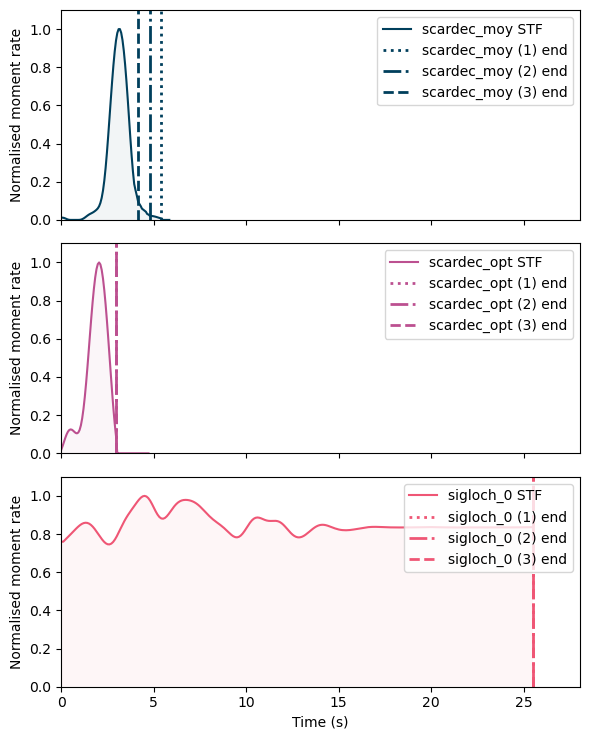

event                                         20150918_1559
scardec    FCTs_20150918_155942_NORTHERN_MID-ATLANTIC_RIDGE
ye                                                        0
isc                                                       0
sigloch                                     0049.2009.217.a
usgs                                                      0
mag                                                6.010667
Name: 24, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19 105 106 107 108 109 110 111 112 113 114 115 116]
1
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
17
0
[]
0
25.5


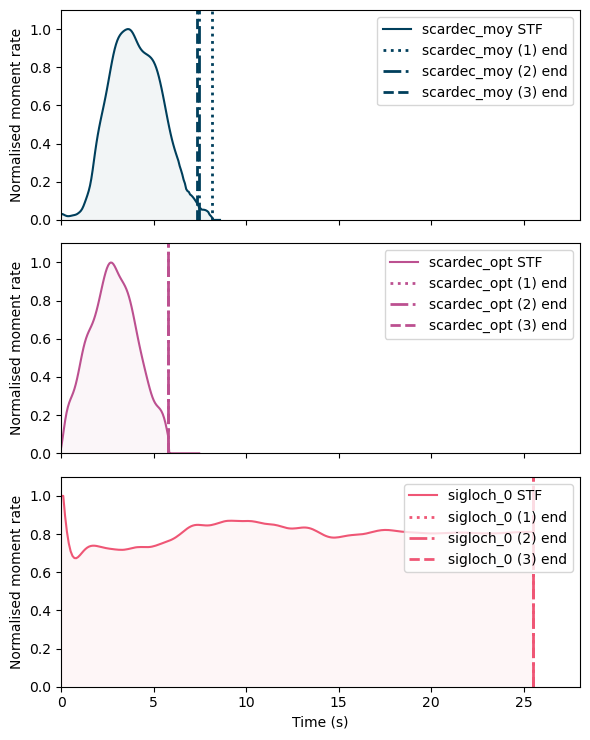

event                                20030106_2343
scardec    FCTs_20030106_234350_LUZON__PHILIPPINES
ye                                               0
isc                                              0
sigloch                            0249.2003.006.a
usgs                                             0
mag                                         5.9625
Name: 107, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 174 175 176]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
17
0
[]
0
0
[]
0
25.

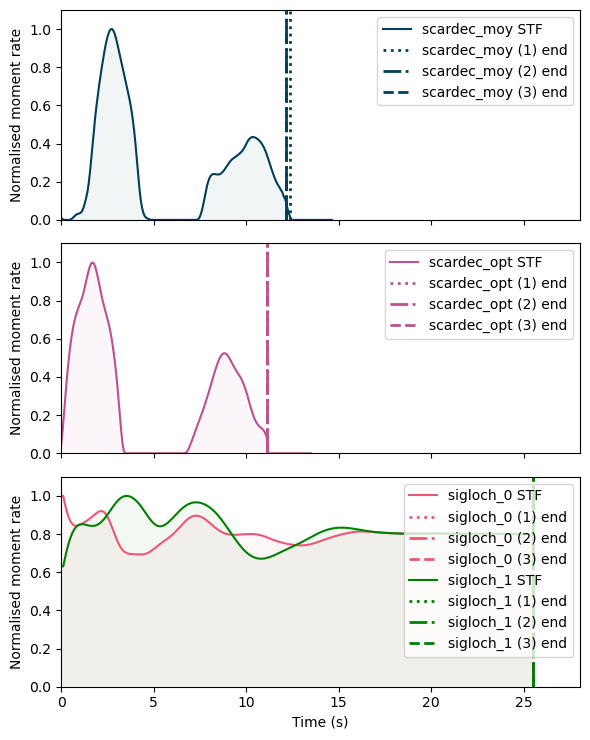

event                                          20050119_0611
scardec    FCTs_20050119_061136_OFF_EAST_COAST_OF_HONSHU_...
ye                                                         0
isc                                                        0
sigloch                                      0229.2005.019.a
usgs                                                       0
mag                                                    6.559
Name: 135, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 378 379 380
 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398
 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26 

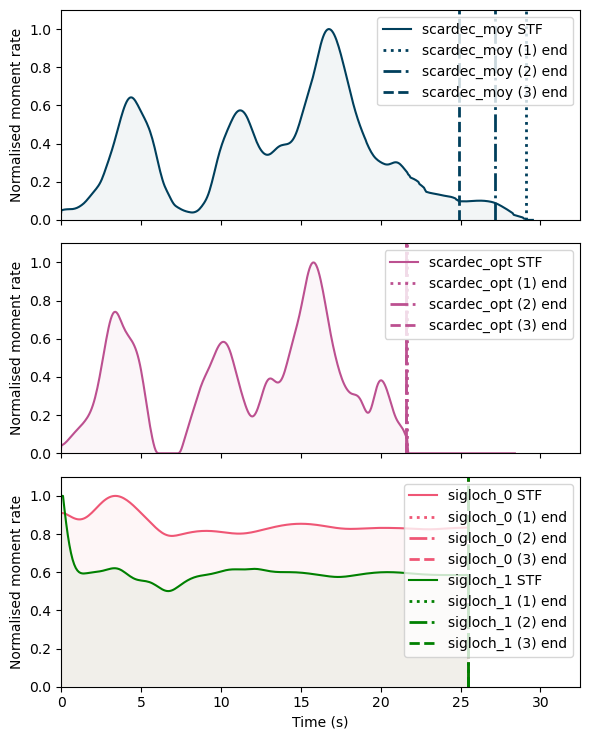

event                             20220926_0959
scardec    FCTs_20220926_095956_REYKJANES_RIDGE
ye                                            0
isc                                           0
sigloch                                       0
usgs                                          0
mag                                       5.728
Name: 145, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  26  27  28
  29  30  31  32  33  34 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  71  72  73  74  82  83  84  85  86  87  88  89 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 1

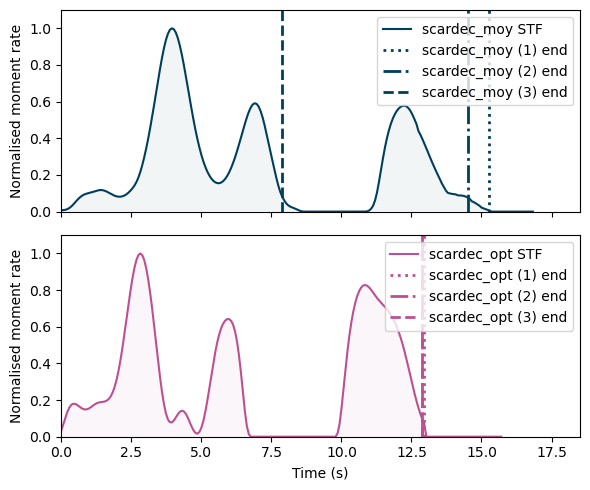

event                                 20210218_1530
scardec    FCTs_20210218_153047_FIJI_ISLANDS_REGION
ye                                                0
isc                                               0
sigloch                                           0
usgs                                              0
mag                                           6.277
Name: 148, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  81  82  83  84  85  86  87  88  89  90  91 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 246 247
 248 249]
1
20
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  

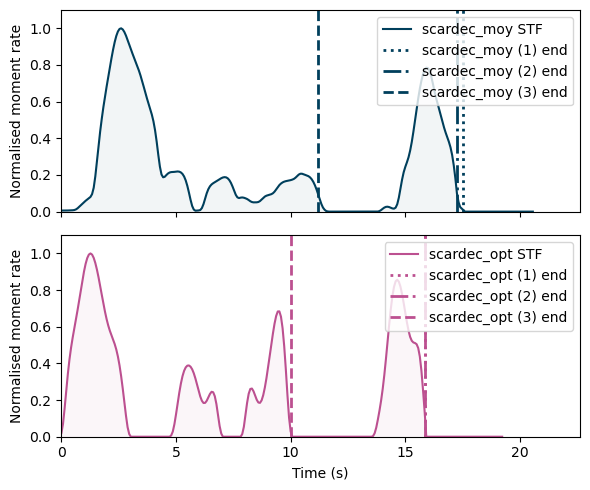

event                                       19950625_0210
scardec    FCTs_19950625_021039_NEW_IRELAND_REGION__P.N.G
ye                                                      0
isc                                                     0
sigloch                                                 0
usgs                                                    0
mag                                                 6.431
Name: 153, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19 100 101 102 103 104 105 106 107 108 109 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 294 295 296 297 298 299 300 301
 302 303 304 305 306 307 308 309 310 311 312 313 314 315

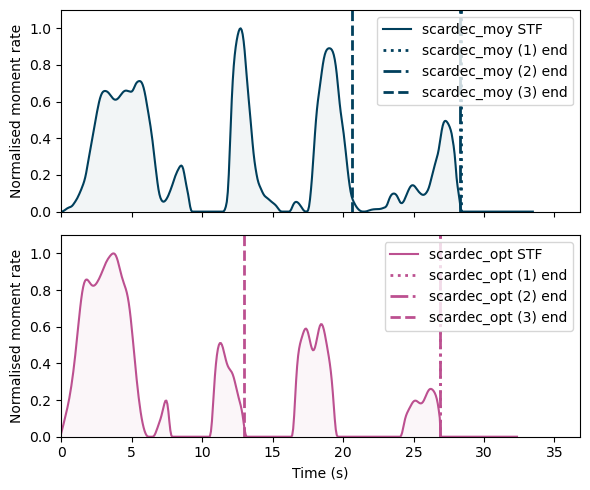

event                                    19930712_1317
scardec    FCTs_19930712_131711_HOKKAIDO__JAPAN_REGION
ye                                                   0
isc                                                  0
sigloch                                              0
usgs                               19930712_131711.txt
mag                                              7.663
Name: 183, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46 330 331 332 333 334 335 336
 337 338 339 340 341 342 343 344 345 346 347 348 349 599 600 601 602 603
 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621
 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639
 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  1

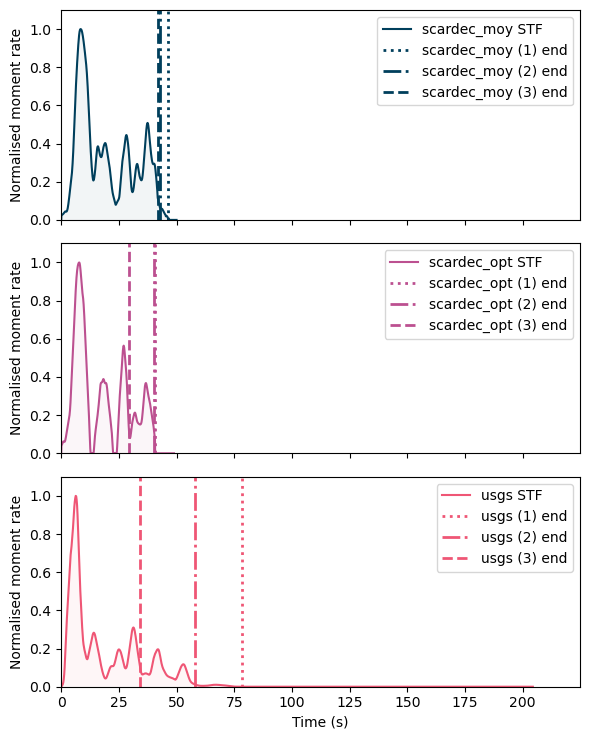

event                                          20050124_0416
scardec    FCTs_20050124_041647_NICOBAR_ISLANDS__INDIA_RE...
ye                                                         0
isc                                                        0
sigloch                                      0704.2005.024.a
usgs                                                       0
mag                                                   6.2905
Name: 194, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213]
1
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
17
0
[]
0
0
[]
0
0
[]
0
25.5


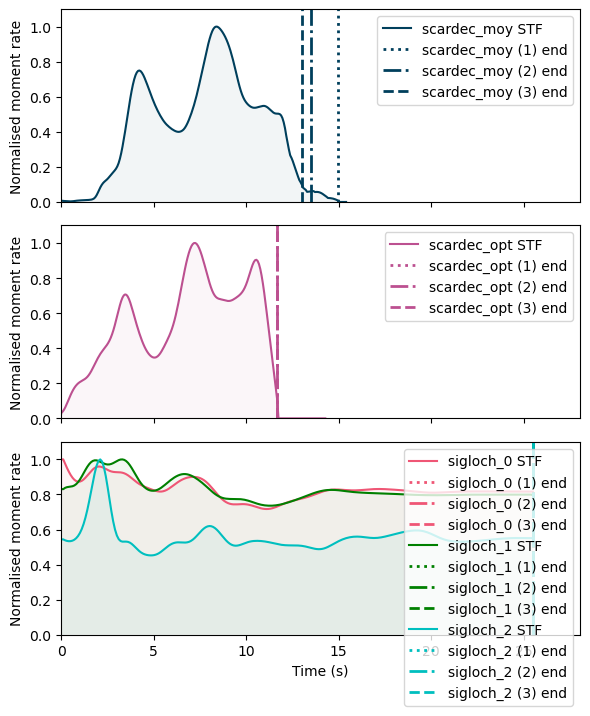

event                              20210616_0443
scardec    FCTs_20210616_044307_SERAM__INDONESIA
ye                                             0
isc                                            0
sigloch                                        0
usgs                                           0
mag                                        6.125
Name: 261, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 13

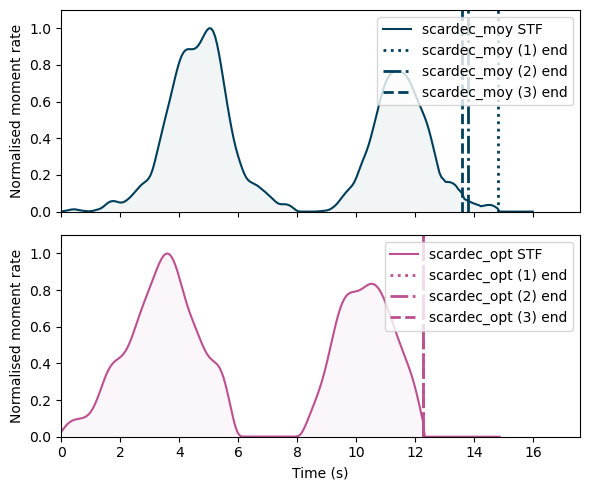

event                                          20140401_2346
scardec    FCTs_20140401_234647_NEAR_COAST_OF_NORTHERN_CHILE
ye                               201404012346_Nchile.mrf.txt
isc                                                        0
sigloch                                                    0
usgs                                     20140401_234647.txt
mag                                                   8.0725
Name: 308, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 13

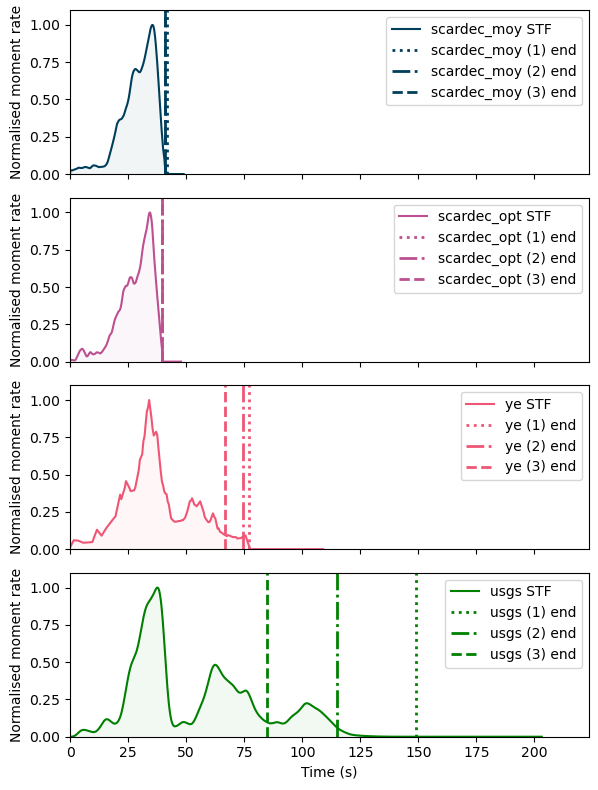

event                                 20141113_1024
scardec    FCTs_20141113_102418_FIJI_ISLANDS_REGION
ye                                                0
isc                                               0
sigloch                             0181.2014.317.a
usgs                                              0
mag                                           6.005
Name: 393, dtype: object
9
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139]
9
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 58 59 60 61]
17
0
[]
0
25.5


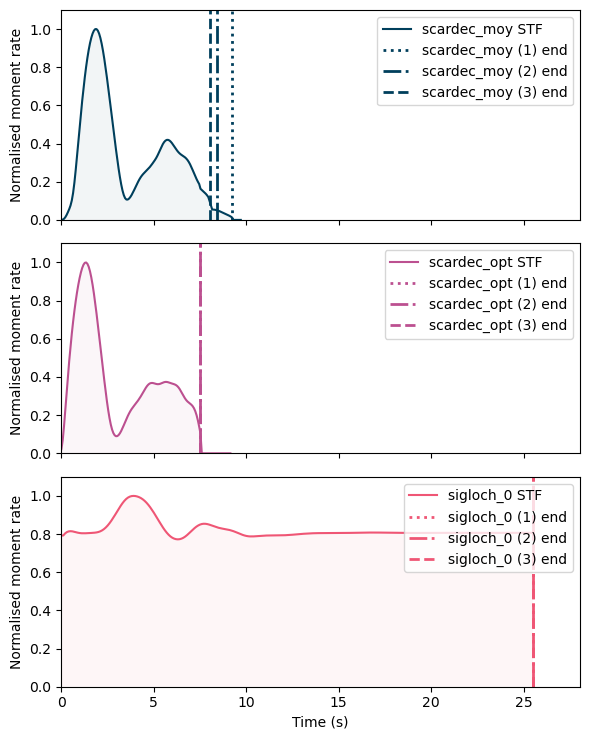

event                                    20181021_0140
scardec    FCTs_20181021_014037_SOUTHWEST_INDIAN_RIDGE
ye                                                   0
isc                                                  0
sigloch                                              0
usgs                                                 0
mag                                              5.963
Name: 429, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  54
  55  56  57  58  59  60  61  62 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119]
1
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64]
17
8.87475585


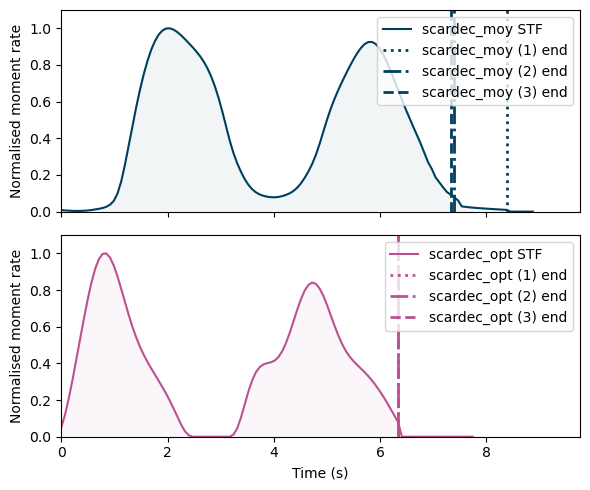

event                                          20071226_2204
scardec    FCTs_20071226_220454_FOX_ISLANDS__ALEUTIAN_ISL...
ye                                                         0
isc                                                        0
sigloch                                      0009.2007.360.a
usgs                                                       0
mag                                                   6.2435
Name: 451, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197]
1
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
17
0
[]
0
0
[]
0
51
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40

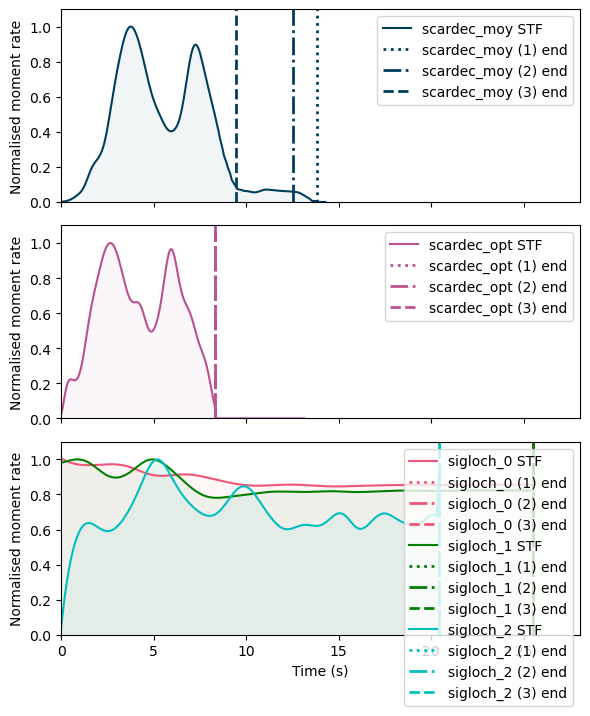

event                               19970706_2013
scardec    FCTs_19970706_201337_NORTH_OF_HONDURAS
ye                                              0
isc                                             0
sigloch                                         0
usgs                                            0
mag                                         5.885
Name: 452, dtype: object
15
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 140]
15
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117]
17
10.7578125


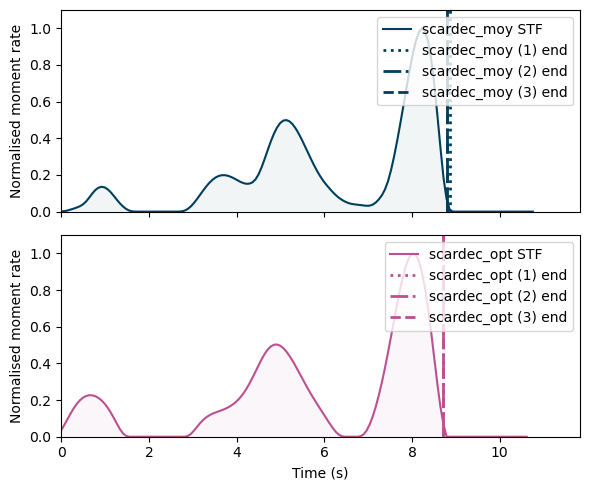

event                                  20190714_0910
scardec    FCTs_20190714_091051_HALMAHERA__INDONESIA
ye                                                 0
isc                                                0
sigloch                                            0
usgs                             20190714_091051.txt
mag                                            7.354
Name: 465, dtype: object
1
[   0  394  395  396  397  398  399  400  401  402  403  497  498  499
  500  501  502  503  504  505  506  507  508  509  510  511  512  513
  514  515  516  517  518  519  520  521  802  803  804  805  806  807
  808  809  810  811  812  813  814  815  816  817  818  819  820  821
  822  823  824  825  826  827  828  829  830  831  832  833  834  835
  836  837  838  839  840  841  842  843  844  845  846  847  848  849
  850  851  852  853  854  855  856  857  858  859  860  861  862  863
  864  865  866  867  868  869  870  871  872  873 1061 1062 1063 1064
 1065 1066 1067 1068 1069 1070 107

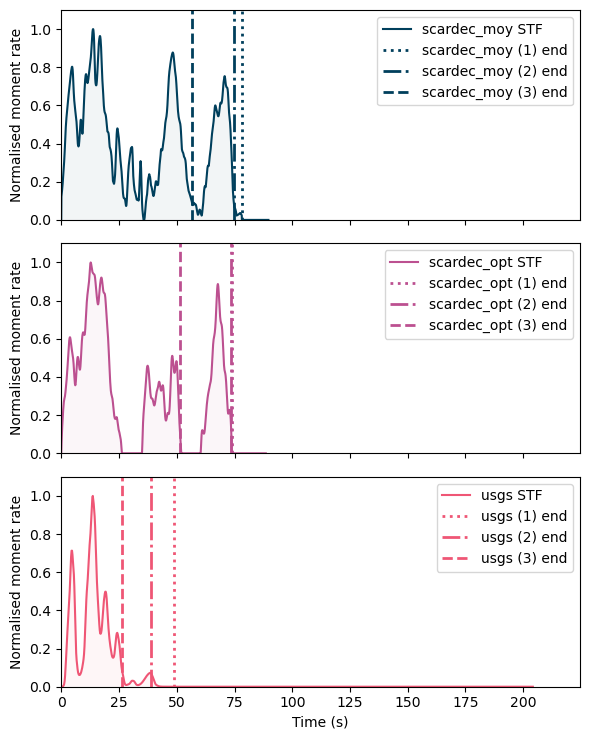

event                             19920626_1132
scardec    FCTs_19920626_113227_SOUTH_OF_PANAMA
ye                                            0
isc                                           0
sigloch                                       0
usgs                                          0
mag                                       5.797
Name: 470, dtype: object
1
[  0   1   2   9  10  11  12  13  14  15  16  17  18  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  92  93  94  95  96  97  98  99 100
 101 102 126]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  88  89  90  91  92  93  94  95  96  97  98  99
 100]
17
10.265625


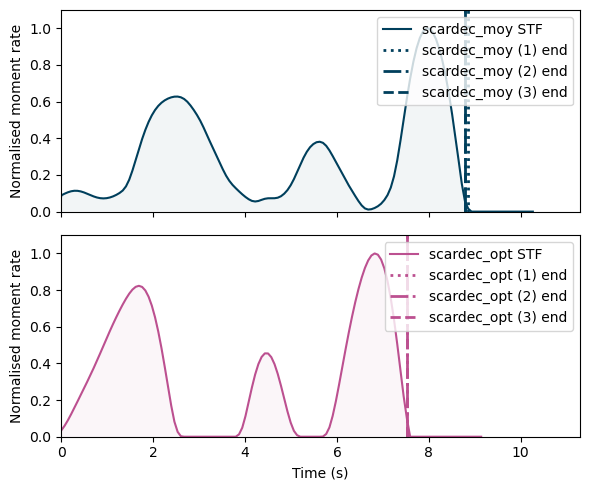

event                                          20151108_1647
scardec    FCTs_20151108_164702_NICOBAR_ISLANDS__INDIA_RE...
ye                                                         0
isc                                                        0
sigloch                                      0704.2015.312.a
usgs                                                       0
mag                                                   6.6035
Name: 471, dtype: object
1
[  0   1   2   3   4   5 235 236 237 238 239 240 241 242 243 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 468 469 470 471 472 473 474 475
 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493
 494 495 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515
 516 517 518 519 520 521 522 523 52

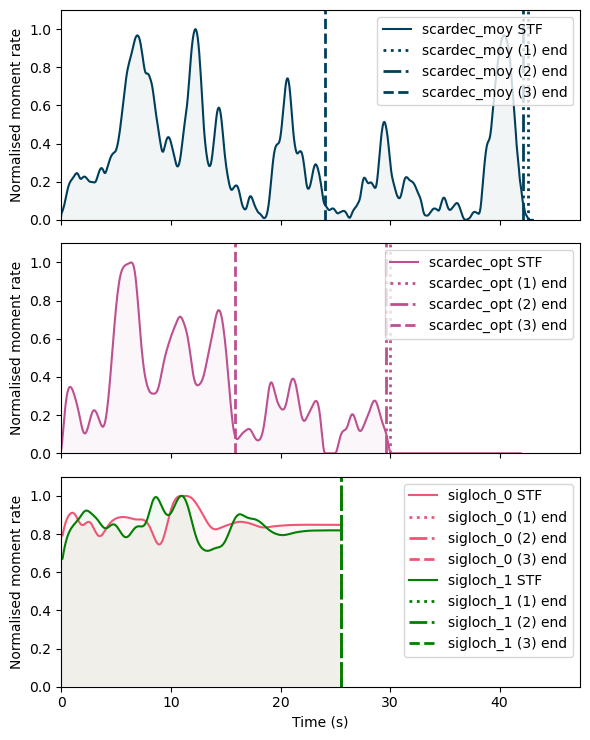

event                                          20021010_1050
scardec    FCTs_20021010_105020_IRIAN_JAYA_REGION__INDONESIA
ye                                                         0
isc                                                        0
sigloch                                                    0
usgs                                     20021010_105020.txt
mag                                                    7.863
Name: 477, dtype: object
1
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24  592  593  594
  595  596  597  598  599  600  601  602  603  749  750  751  752  753
  754  755  756  757  758  759  760  761  762  763  764  765  766  767
  768  769  770  771  772 1465 1466 1467 1468 1469 1470 1471 1472 1473
 1474 1475 1476 1477 1478]
1
17
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30  

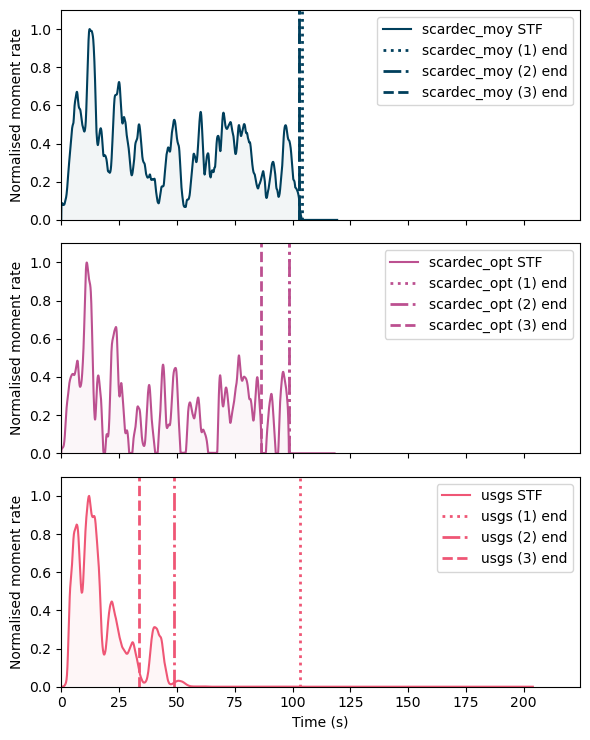

event                                          20190126_0812
scardec    FCTs_20190126_081248_ARU_ISLANDS_REGION__INDON...
ye                                                         0
isc                                                        0
sigloch                                                    0
usgs                                                       0
mag                                                    5.975
Name: 482, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 201 202 203]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  25  26  27  28  29  30  31  32  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 

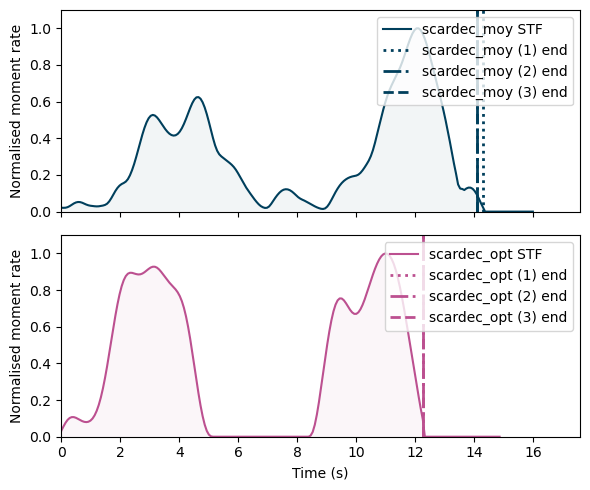

event                                 19970808_2227
scardec    FCTs_19970808_222719_FIJI_ISLANDS_REGION
ye                                                0
isc                                               0
sigloch                                           0
usgs                                              0
mag                                           6.685
Name: 489, dtype: object
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55 203 204 205 206 207 208 209 210 211 212 213 214 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 325 326 327 328 329 330 331 332 333 334 335 336 337 392 393
 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411
 412 413 414 415 416 417

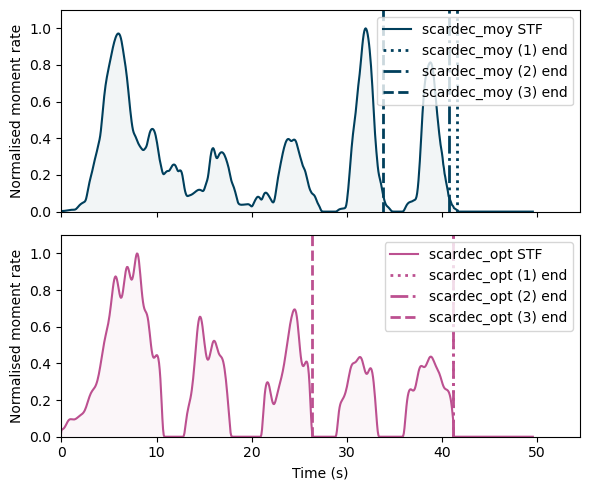

event                           20101220_1841
scardec    FCTs_20101220_184159_SOUTHERN_IRAN
ye                                          0
isc                                         0
sigloch                       0353.2010.354.a
usgs                                        0
mag                                     6.729
Name: 496, dtype: object
1
[  0   1   2   3   4   5   6   7   8 237 238 239 240 241 242 243 244 245
 246 247 248 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 525 526 527 528 529 530 531 532
 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 54

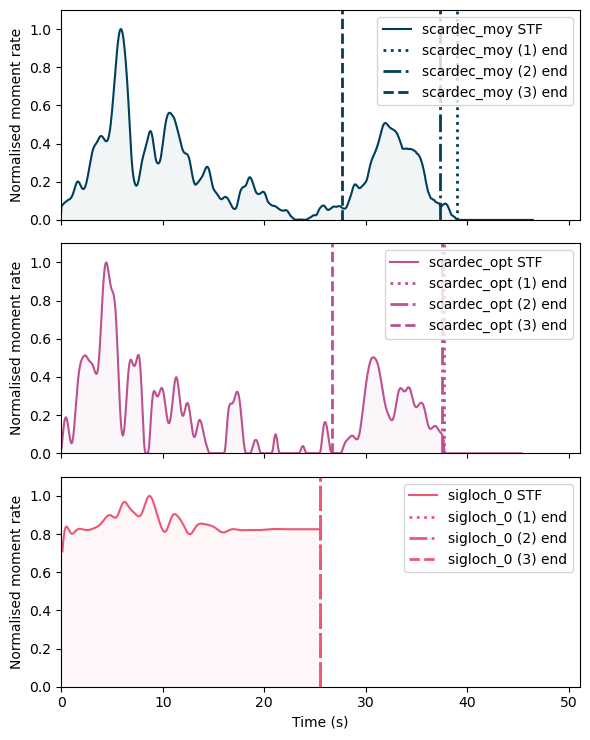

event                                       19950529_0729
scardec    FCTs_19950529_072945_SANTA_CRUZ_ISLANDS_REGION
ye                                                      0
isc                                                     0
sigloch                                                 0
usgs                                                    0
mag                                                 6.475
Name: 502, dtype: object
1
[  0 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 286 287 288 289 290 291 292 293 294 295 296 297 298 299 324
 325 326 327 328 329 330 331 332 333 401 402 403]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 

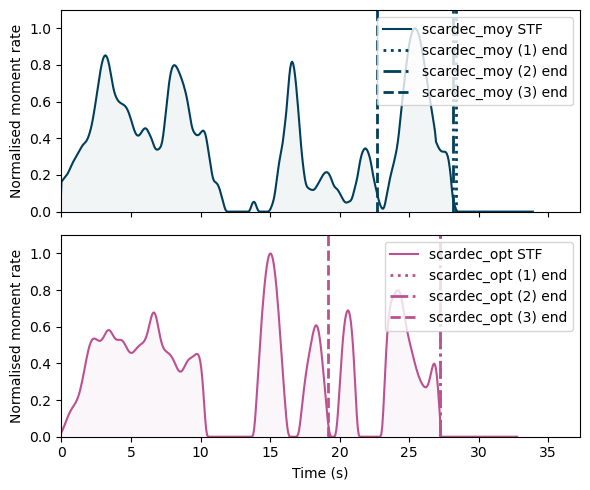

event                                          20020326_0345
scardec    FCTs_20020326_034548_SOUTHWESTERN_RYUKYU_ISL._...
ye                                                         0
isc                                                        0
sigloch                                      0246.2002.085.a
usgs                                                       0
mag                                                    6.504
Name: 508, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 402 403 404 405 406 407 408 409 410]
1
17
[  0   1   2   3   4   5   6   7 

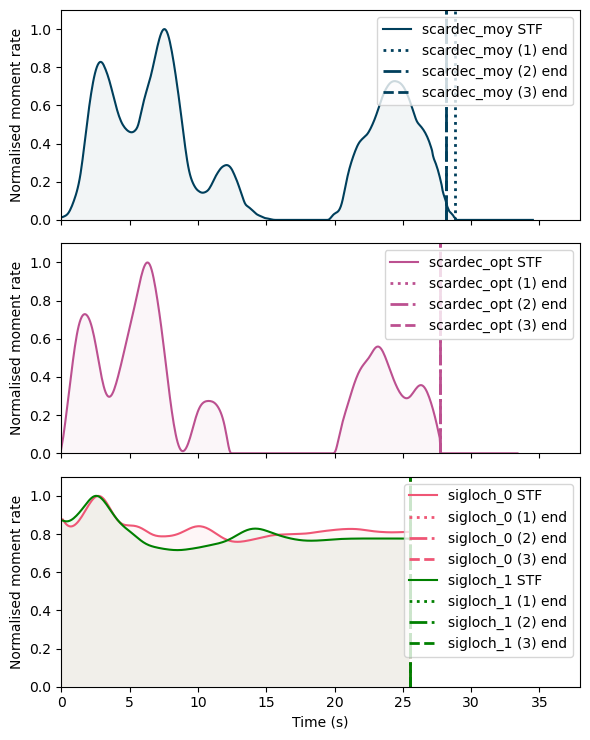

event                                          20110319_0122
scardec    FCTs_20110319_012244_NEAR_EAST_COAST_OF_HONSHU...
ye                                                         0
isc                                                        0
sigloch                                      0228.2011.078.a
usgs                                                       0
mag                                                   5.9605
Name: 518, dtype: object
1
[  0  12  13  14  15  16  17  18  19 141 142 143]
1
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 73 74 75
 76 77 78 79 80]
17
0
[]
0
25.5


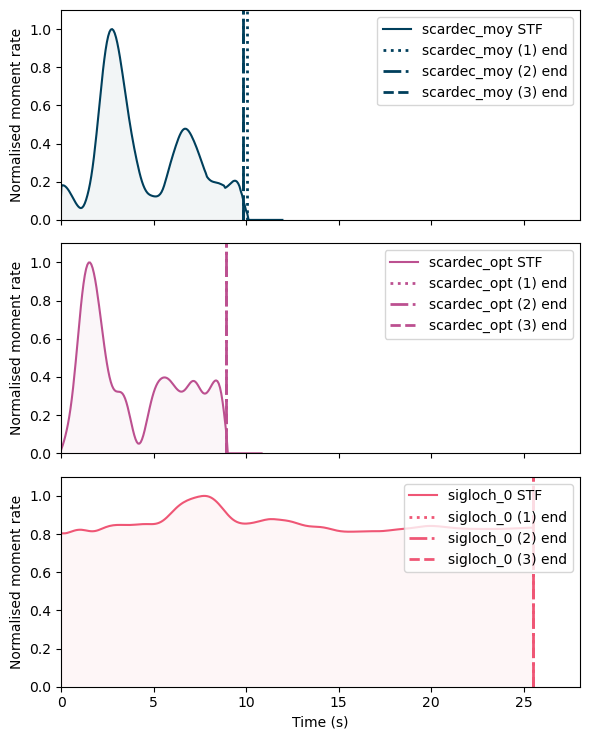

event                       20060815_0305
scardec    FCTs_20060815_030511_BANDA_SEA
ye                                      0
isc                                     0
sigloch                                 0
usgs                                    0
mag                                 5.914
Name: 525, dtype: object
8
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  87  88  89  90  91  92  93  94
  95  96  97  98  99 100]
8
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63]
17
7.03125


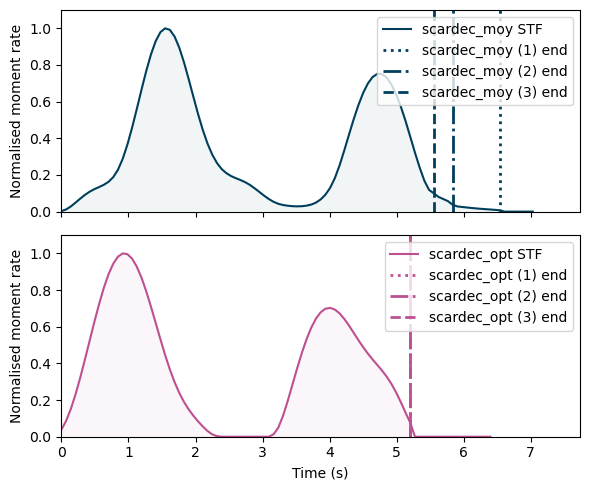

event                          20030628_1529
scardec    FCTs_20030628_152942_BISMARCK_SEA
ye                                         0
isc                                        0
sigloch                      0203.2003.179.a
usgs                                       0
mag                                    6.235
Name: 526, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 288 289 290
 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308
 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326
 327 376 377 378 379 380 381 382 383 384]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  2

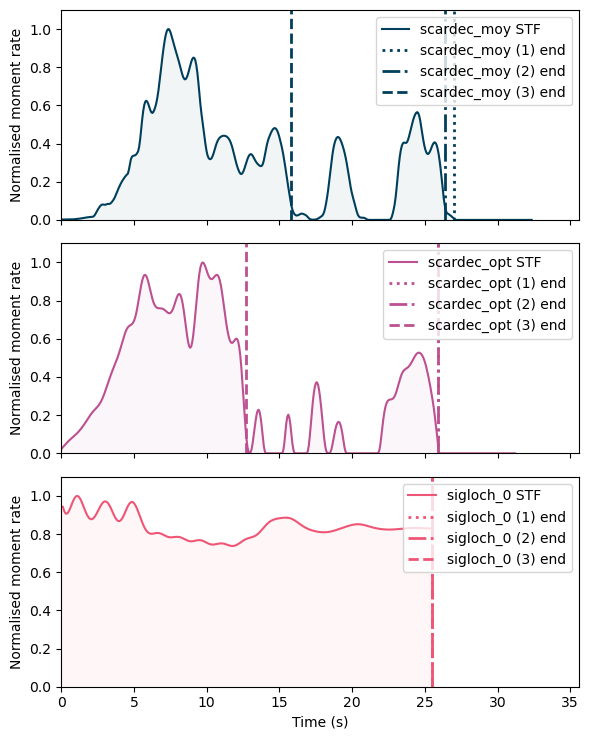

event                             20010614_2331
scardec    FCTs_20010614_233128_MARIANA_ISLANDS
ye                                            0
isc                                           0
sigloch                         0216.2001.165.a
usgs                                          0
mag                                      5.9485
Name: 534, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181]
1
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
17
0
[]
0
0
[]
0
25.5


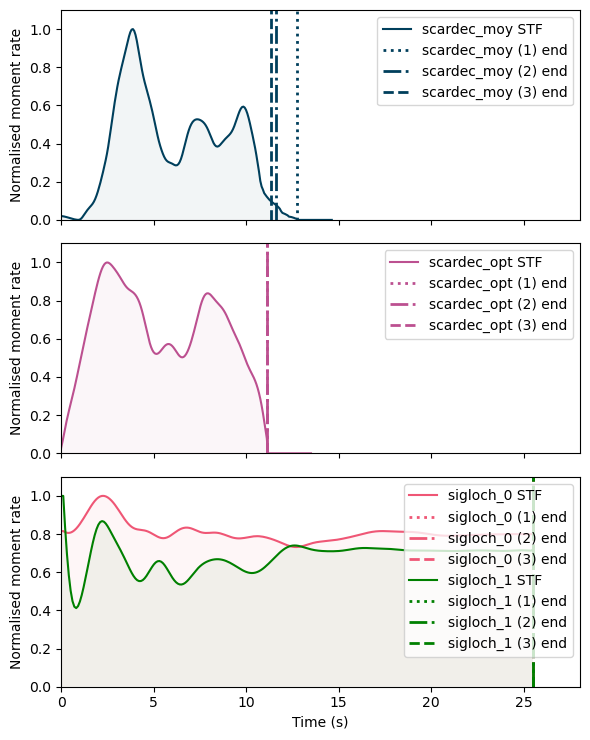

event                           20141028_0315
scardec    FCTs_20141028_031537_TONGA_ISLANDS
ye                                          0
isc                                         0
sigloch                       0173.2014.301.a
usgs                                        0
mag                                     6.085
Name: 547, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  19  20  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 180 181 182 183 184 185]
1
21
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 176 177 178]
21
0
[]
0
25.5


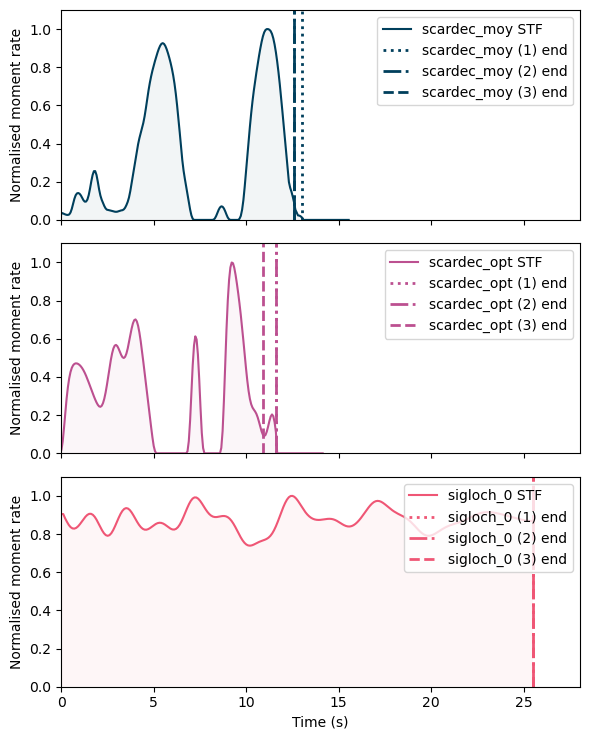

event                             19920720_0746
scardec    FCTs_19920720_074646_SVALBARD_REGION
ye                                            0
isc                                           0
sigloch                         0643.1992.202.a
usgs                                          0
mag                                      6.7855
Name: 555, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 347 348 349 350 351
 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369
 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 456 457
 458 459 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590
 591 592 593 594 595 596 597 598 599 600]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 2

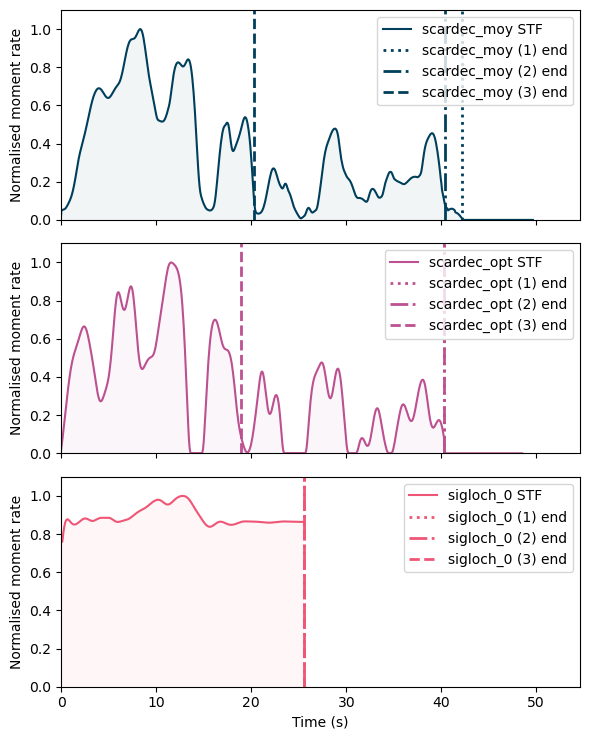

event                                          19970728_0646
scardec    FCTs_19970728_064655_VOLCANO_ISLANDS__JAPAN_RE...
ye                                                         0
isc                                                        0
sigloch                                                    0
usgs                                                       0
mag                                                    5.985
Name: 585, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  57  58  59  60  61  62  63  64  95
  96  97  98  99 100 101 102 103 133 134 135 136 137 138 139 167 168 169
 170 171 172 173 174]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  57  58  59  60  61  62  63  64  65  66  67  68  69  94  95
  96  97  98  99 100 101 102 103 104 131 132 133 134 135 136 137 138]
17
13.640625


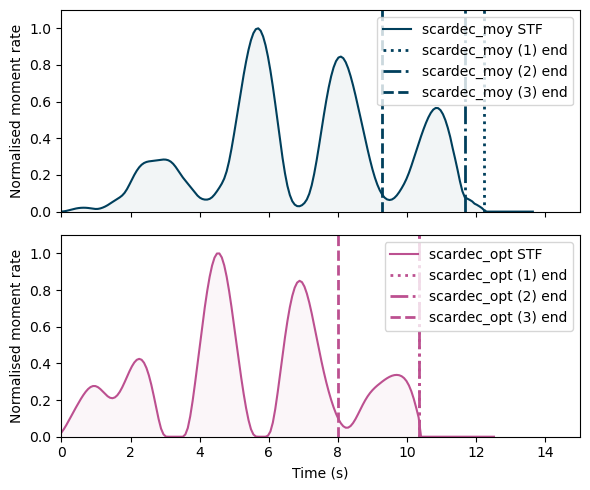

event                       20080419_0312
scardec    FCTs_20080419_031225_BANDA_SEA
ye                                      0
isc                                     0
sigloch                   0280.2008.110.a
usgs                                    0
mag                                 6.122
Name: 603, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 201]
17
0
[]
0


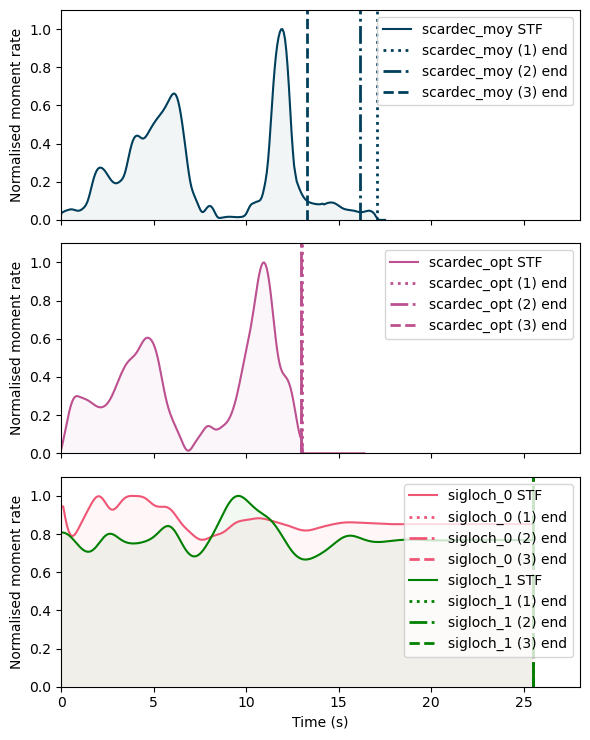

event                                        20010704_1747
scardec    FCTs_20010704_174745_SOUTHEAST_OF_HONSHU__JAPAN
ye                                                       0
isc                                                      0
sigloch                                    0230.2001.185.a
usgs                                                     0
mag                                                  5.822
Name: 617, dtype: object
12
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  50  51  52  53  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 158 159 160 161 162 163 164 165]
12
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 

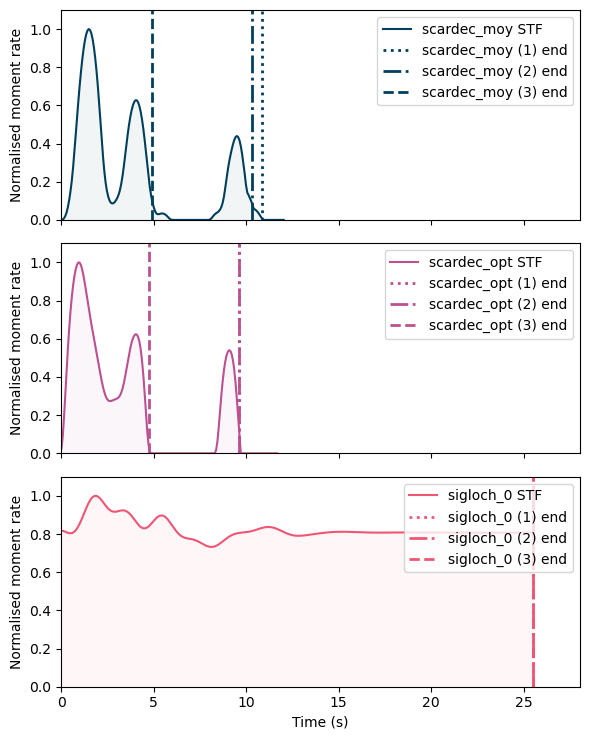

event                           20150524_1438
scardec    FCTs_20150524_143859_TONGA_ISLANDS
ye                                          0
isc                                         0
sigloch                       0173.2015.144.a
usgs                                        0
mag                                     6.318
Name: 622, dtype: object
1
[  0   1   2   3 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 227 228 229 230 438 439 440 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  87  88  89  90  91  92  93  94  95  96 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 179 180 181
 182 183 184 185 186 187 188 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 252 253 254 255 256
 257 258 259 260 261 262

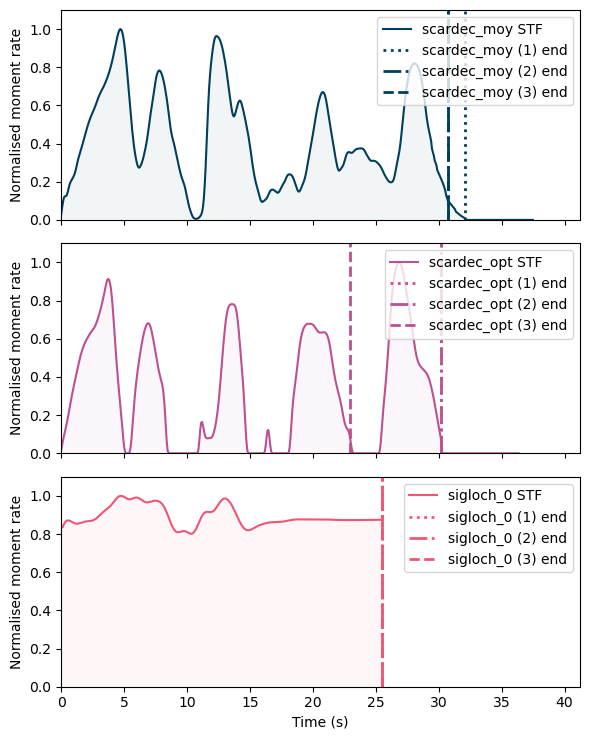

event                                         19961209_1128
scardec    FCTs_19961209_112848_NORTHERN_MID-ATLANTIC_RIDGE
ye                                                        0
isc                                                       0
sigloch                                     0403.1996.344.a
usgs                                                      0
mag                                                  6.0205
Name: 642, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  94  95  96  97
  98  99 100 101 102 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 256 257 258]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  2

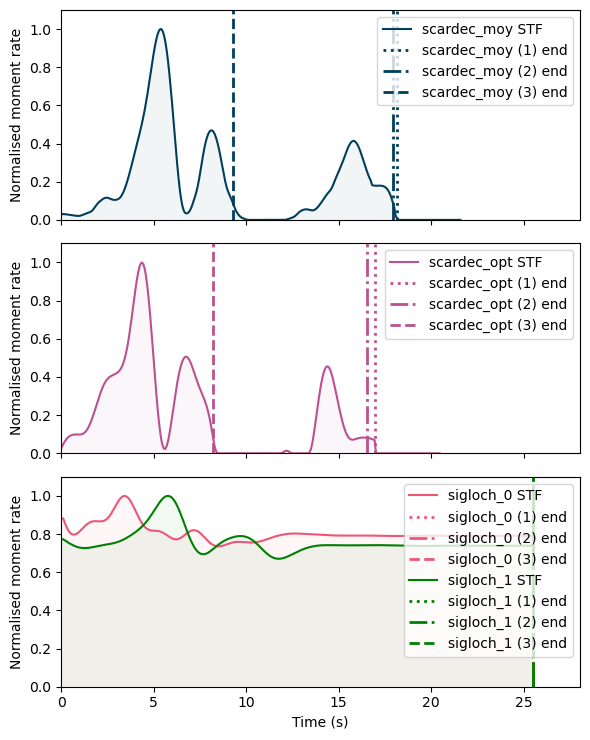

event                                      19940603_2106
scardec    FCTs_19940603_210659_SOUTH_OF_JAVA__INDONESIA
ye                                                     0
isc                                                    0
sigloch                                                0
usgs                                                   0
mag                                                6.629
Name: 649, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 29

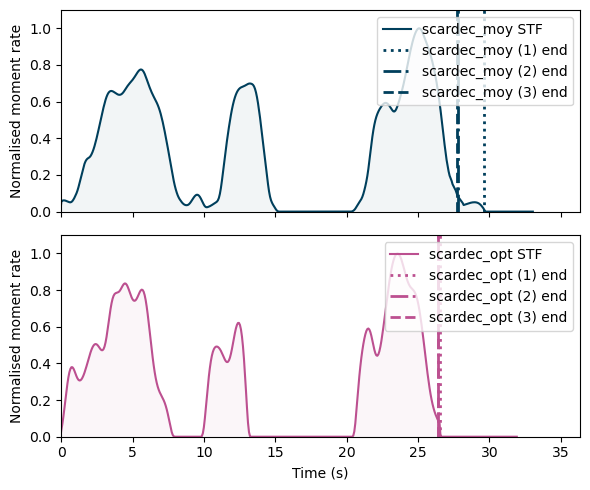

event                                          20181205_0418
scardec    FCTs_20181205_041808_SOUTHEAST_OF_LOYALTY_ISLANDS
ye                                                         0
isc                                                        0
sigloch                                                    0
usgs                                     20181205_041808.txt
mag                                                    7.512
Name: 654, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469
 470 471 472 473 474 475 476 477 47

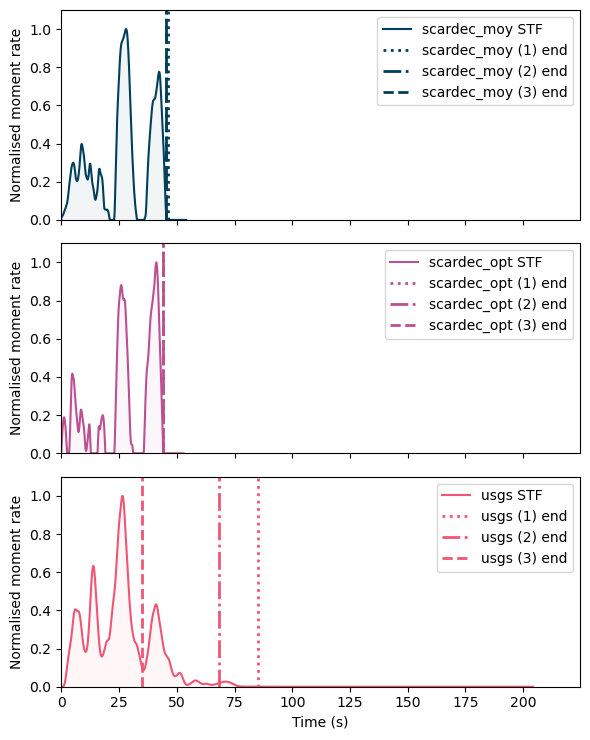

event                             20110113_1616
scardec    FCTs_20110113_161641_LOYALTY_ISLANDS
ye                                            0
isc                                           0
sigloch                         0188.2011.013.a
usgs                                          0
mag                                        6.99
Name: 666, dtype: object
11
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288

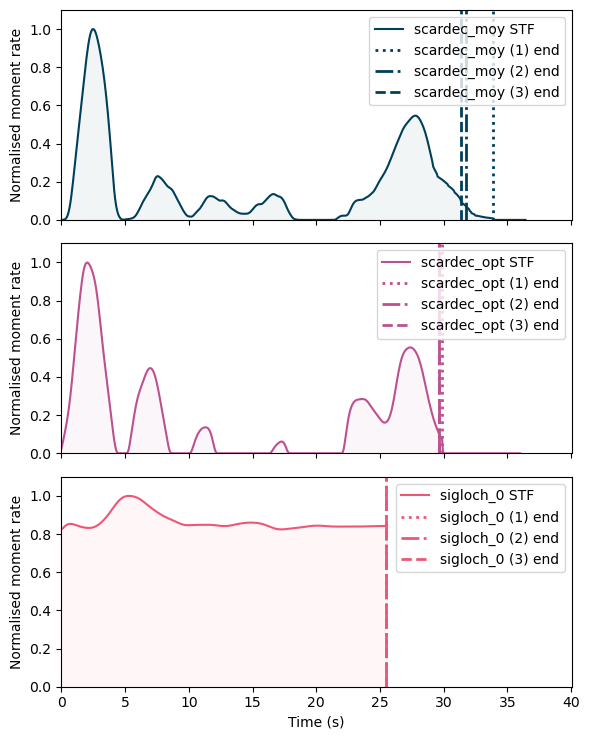

event                                          20030127_1756
scardec    FCTs_20030127_175625_PRINCE_EDWARD_ISLANDS_REGION
ye                                                         0
isc                                                        0
sigloch                                      0431.2003.027.a
usgs                                                       0
mag                                                    6.516
Name: 693, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 417 418 419 420 421 422 423 424 425 426 427 428
 429 430 431]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20 116

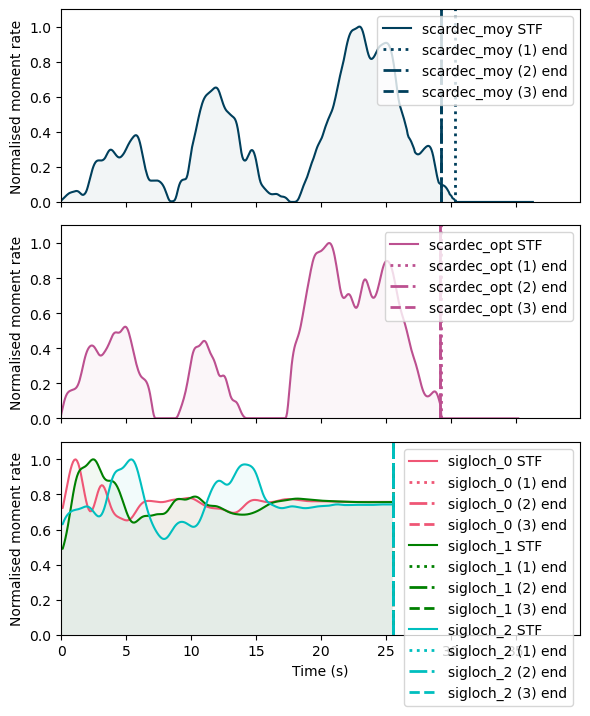

event                              20060506_1826
scardec    FCTs_20060506_182650_MID-INDIAN_RIDGE
ye                                             0
isc                                            0
sigloch                                        0
usgs                                           0
mag                                        5.984
Name: 708, dtype: object
14
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 253]
14
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
 

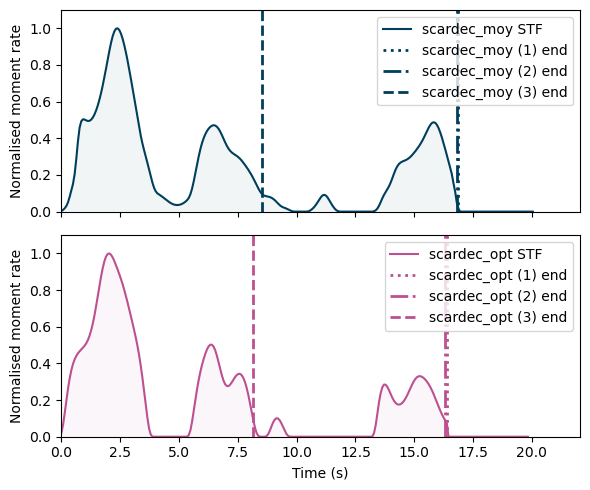

event                       20000828_1505
scardec    FCTs_20000828_150547_BANDA_SEA
ye                                      0
isc                                     0
sigloch                                 0
usgs                                    0
mag                                 6.806
Name: 712, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 429
 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447
 448]
1
17
[  0   1   

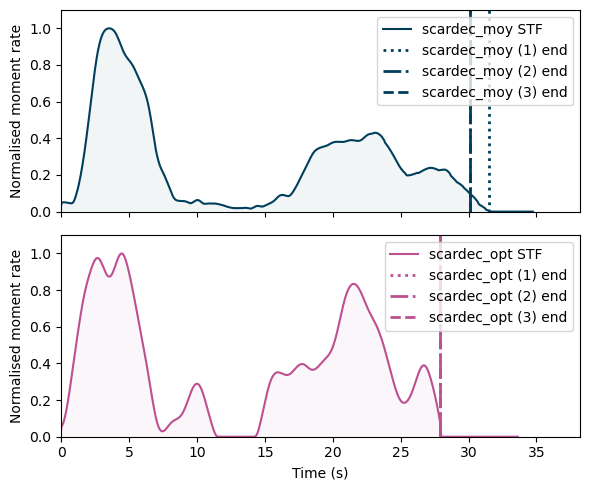

event                                          20140310_0518
scardec    FCTs_20140310_051813_OFF_COAST_OF_NORTHERN_CAL...
ye                                                         0
isc                                                        0
sigloch                                                    0
usgs                                                       0
mag                                                    7.018
Name: 766, dtype: object
1
[  0 257 258 259 260 261 262 263 363 364 365 366 367 368 369 370 371 372
 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390
 391 392 393 394 395 396 494 495 496 497 498 499 500 501 502 503 504 505
 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523
 524 525 526 527 528 529 530 531 532 533 534 535 536 623 624 625 626 627
 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645
 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663
 664 665 666 667 668 763 764 765 76

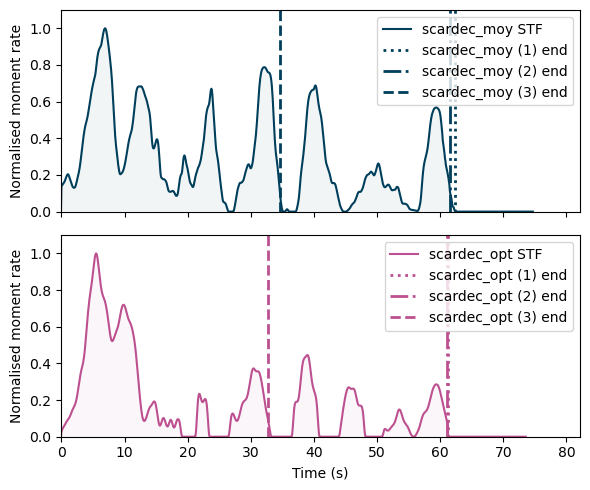

event                                  20160607_1915
scardec    FCTs_20160607_191515_NORTHERN_MOLUCCA_SEA
ye                                                 0
isc                                                0
sigloch                              0266.2016.159.a
usgs                                               0
mag                                            6.321
Name: 775, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  93  94  95  96  97  98  99 100 101 102 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 278 279 280 281 282 283 284 285 286
 287 288]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  1

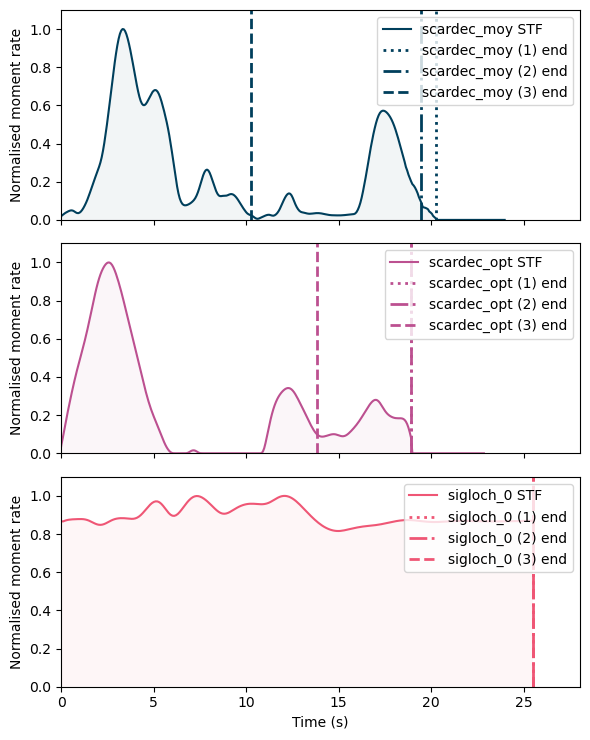

event                                       20020219_0035
scardec    FCTs_20020219_003545_NEW_IRELAND_REGION__P.N.G
ye                                                      0
isc                                                     0
sigloch                                   0190.2002.050.a
usgs                                                    0
mag                                                6.1565
Name: 797, dtype: object
7
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 161
 162 163 164]
7
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96 

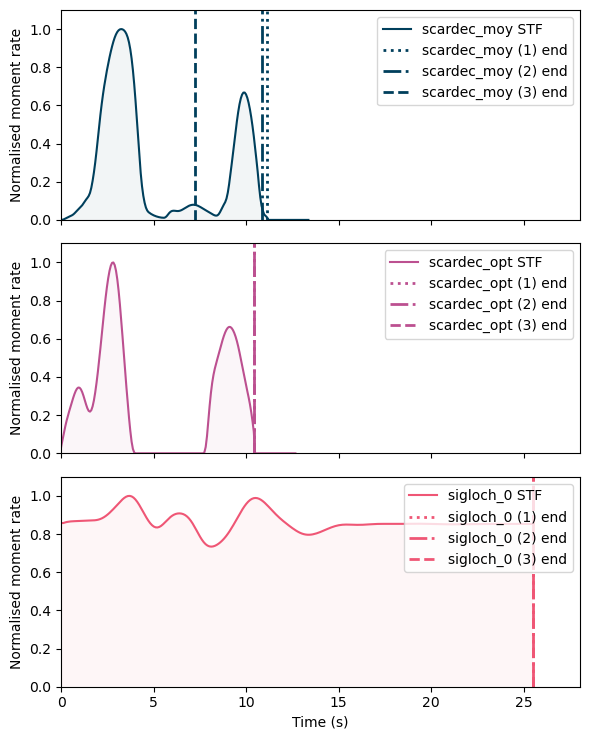

event                                  20110716_0703
scardec    FCTs_20110716_070332_TONGA_ISLANDS_REGION
ye                                                 0
isc                                                0
sigloch                              0174.2011.197.a
usgs                                               0
mag                                           5.8455
Name: 807, dtype: object
2
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76 125 126 127 128
 129 130 131 132 133 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203]
2
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77]
17
0
[]
0
25.5


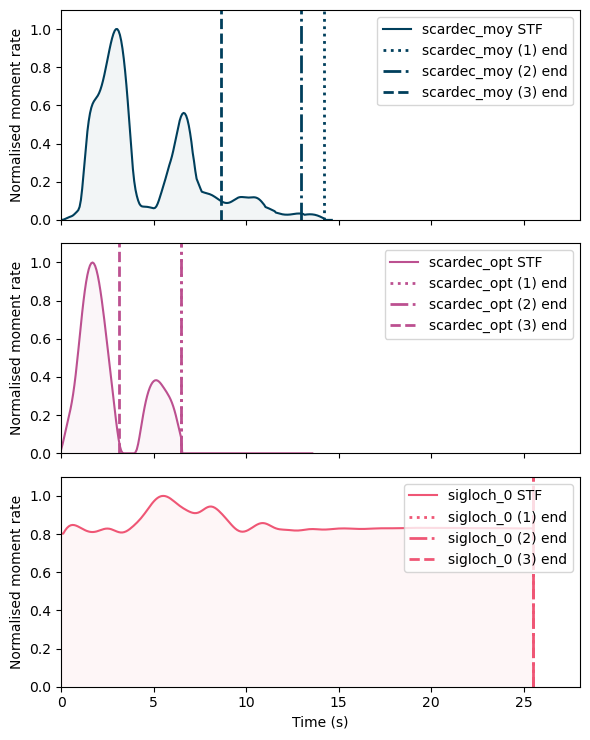

event                             20140513_0635
scardec    FCTs_20140513_063524_SOUTH_OF_PANAMA
ye                                            0
isc                                           0
sigloch                         0083.2014.133.a
usgs                                          0
mag                                       6.526
Name: 825, dtype: object
1
[  0  70  71  72  73  74  75  76  77  90  91  92  93  94 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 419
 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437
 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455
 456 457 458 459 460 461 462 463 464 465]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  

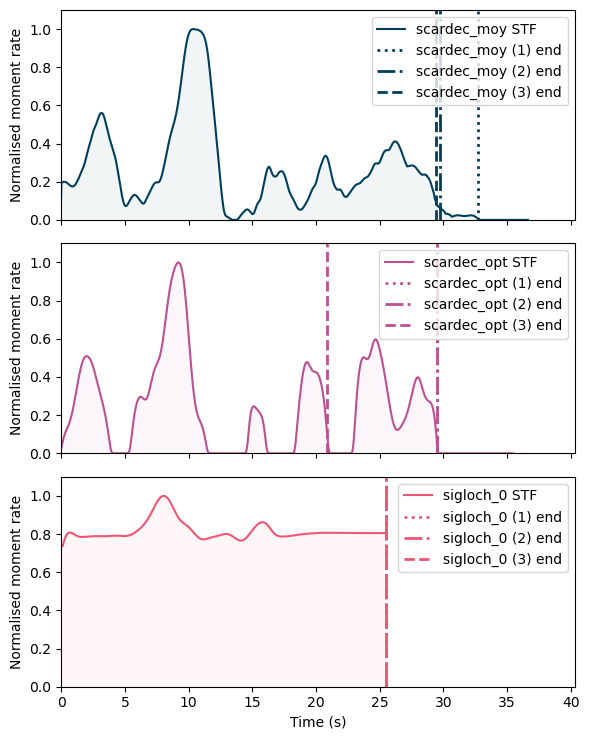

event                                20070902_0105
scardec    FCTs_20070902_010518_SANTA_CRUZ_ISLANDS
ye                  200709020105_SantaCruz.mrf.txt
isc                                              0
sigloch                                          0
usgs                                             0
mag                                          7.077
Name: 833, dtype: object
1
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  205  206  207  208  209  210  211  212
  213  214  215  216  217  218  219  220  221  222  223  224  225  226
  227  228  229  230  231  232  233  234  235  236  237  238  239  240
  241  242  243  244  245  246  247  248  249  250  251  252  253  254
  255  256  257  258  259  260  261  262  263  306  307  308  309  310
  311  312  313  314  315  316  317  318  319  3

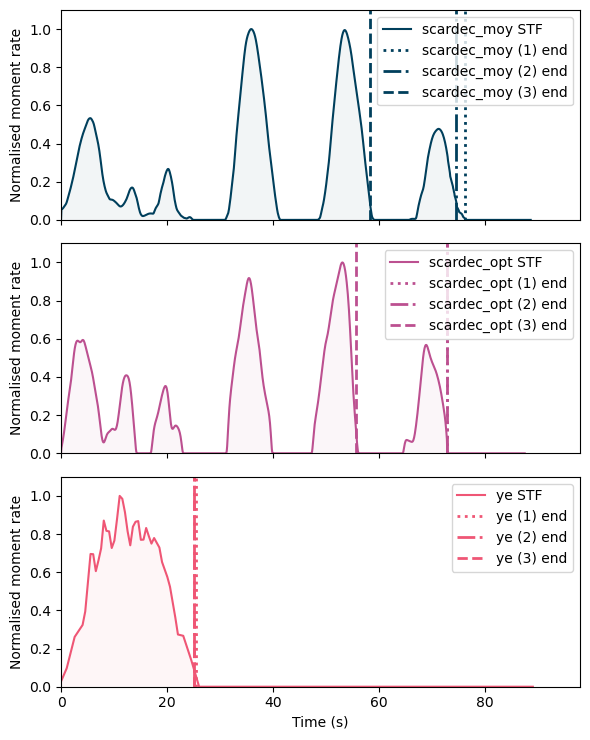

event                                          19950210_0145
scardec    FCTs_19950210_014503_OFF_E._COAST_OF_N._ISLAND...
ye                                                         0
isc                                                        0
sigloch                                                    0
usgs                                                       0
mag                                                    6.566
Name: 874, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  40  41  42  43  44  45  46  47
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 390 391 392 393 394 395 396 397 39

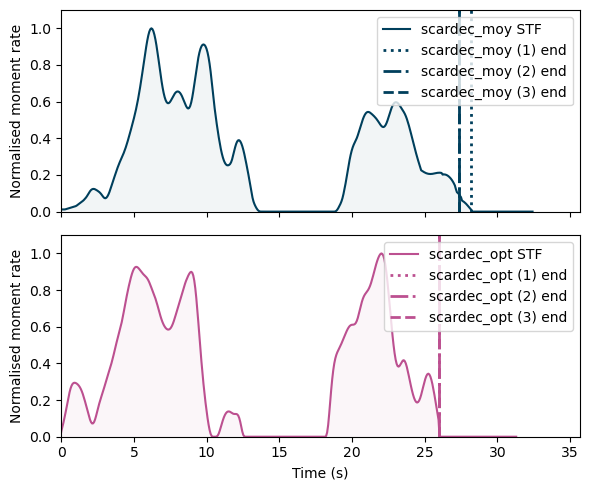

event                                          20130915_1621
scardec    FCTs_20130915_162137_ANDREANOF_ISLANDS__ALEUTI...
ye                                                         0
isc                                                        0
sigloch                                      0007.2013.258.a
usgs                                                       0
mag                                                   6.1425
Name: 878, dtype: object
3
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 200 201
 202 203 204 205 206 207 208 209 210 211]
3
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
17
0
[]
0
25.5


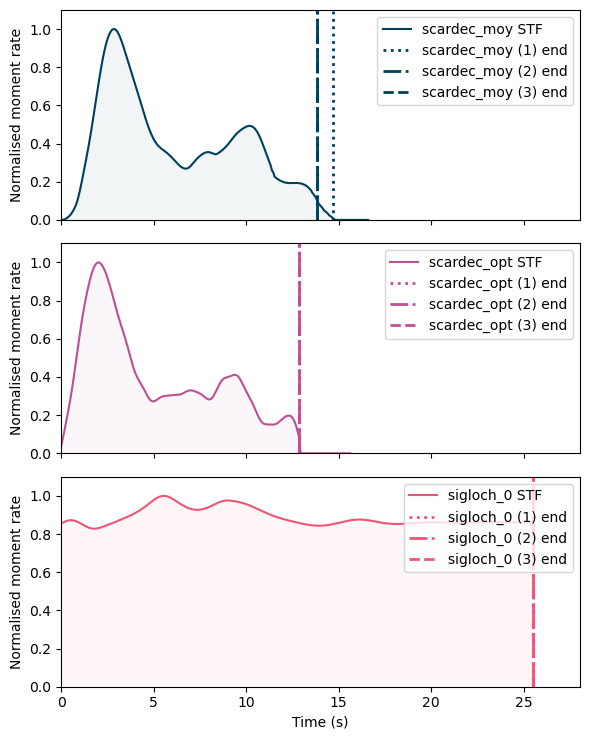

event                                          20181115_2002
scardec    FCTs_20181115_200222_SOUTH_SANDWICH_ISLANDS_RE...
ye                                                         0
isc                                                        0
sigloch                                                    0
usgs                                                       0
mag                                                    6.563
Name: 883, dtype: object
1
[  0   1   2 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 31

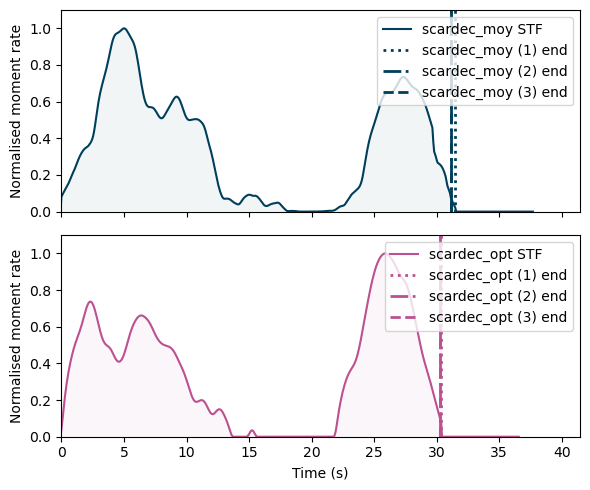

event                                        20150919_0506
scardec    FCTs_20150919_050647_OFF_COAST_OF_CENTRAL_CHILE
ye                                                       0
isc                                                      0
sigloch                                    0134.2015.262.a
usgs                                                     0
mag                                                  6.081
Name: 924, dtype: object
11
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226

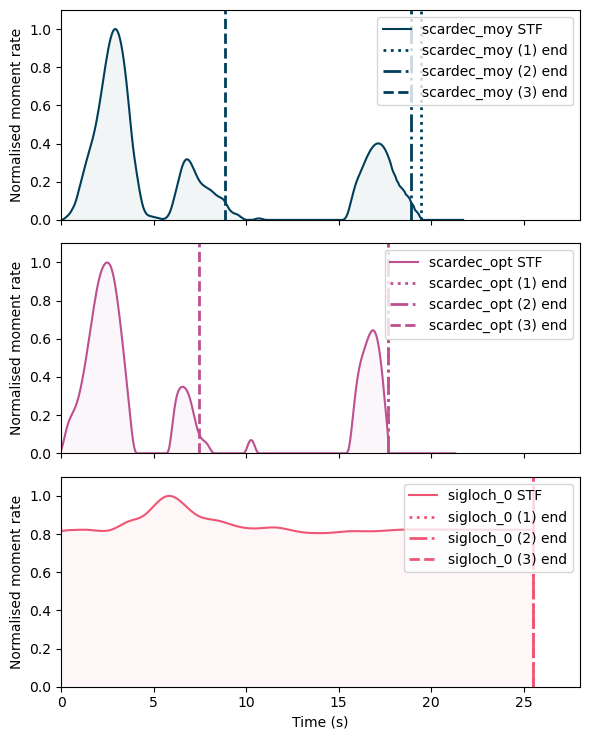

event                              20131004_1726
scardec    FCTs_20131004_172613_MID-INDIAN_RIDGE
ye                                             0
isc                                            0
sigloch                          0429.2013.277.a
usgs                                           0
mag                                        6.397
Name: 929, dtype: object
1
[  0   1   2   3   4   5   6  13  14  15  16  17  18  19  20  21  22 177
 178 179 180 181 182 183 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 250 251
 252 25

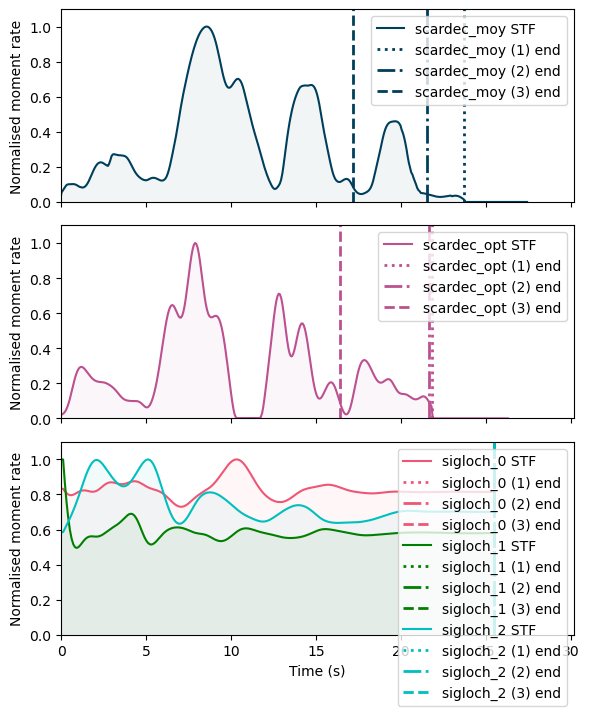

event                                          20120605_1931
scardec    FCTs_20120605_193133_OFF_EAST_COAST_OF_HONSHU_...
ye                                                         0
isc                                                        0
sigloch                                      0229.2012.157.a
usgs                                                       0
mag                                                    6.184
Name: 931, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  70  71  72  73  74  75  76
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 202 203 204 205 206 207 208 209 210 211 293 294 295 296
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346]
1
17
[  0   1

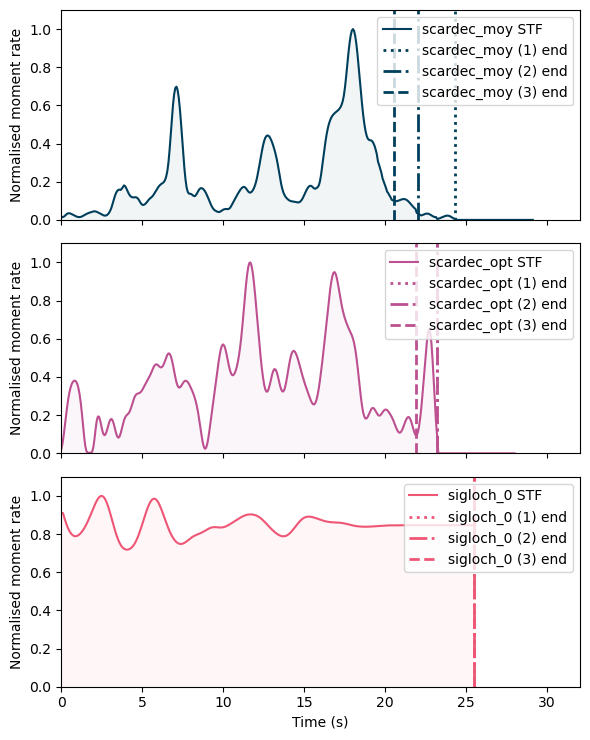

event                                          20080416_0554
scardec    FCTs_20080416_055419_ANDREANOF_ISLANDS__ALEUTI...
ye                                                         0
isc                                                        0
sigloch                                      0280.2009.240.a
usgs                                                       0
mag                                                 6.646333
Name: 933, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12 358 359 360 361 362
 363 364 365 366 367 368 369 370 409 410 411 412 413 414 415 416 417 418
 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436
 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472
 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490
 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 511 512 513
 514 515 516 517 518 519 520 521 52

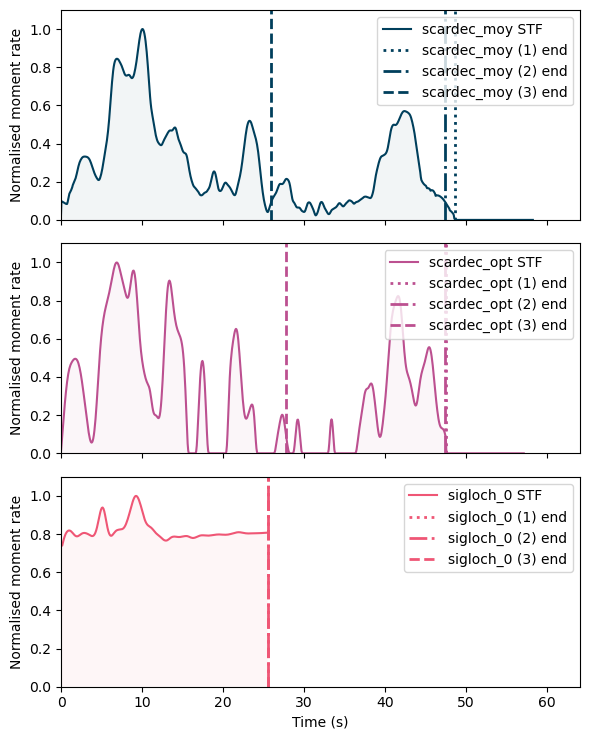

event                                       20050516_0354
scardec    FCTs_20050516_035414_SOUTH_OF_KERMADEC_ISLANDS
ye                                                      0
isc                                                     0
sigloch                                   0179.2005.136.a
usgs                                                    0
mag                                                6.5695
Name: 937, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19 158 159 160]
17
0
[]
0
0
[]
0
25.5


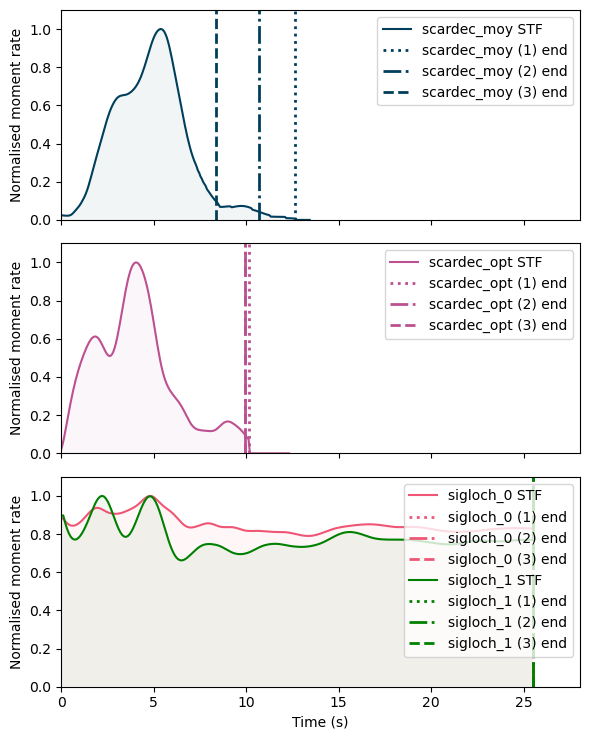

event                               20040909_1633
scardec    FCTs_20040909_163321_NORTH_OF_HONDURAS
ye                                              0
isc                                             0
sigloch                           0094.2004.253.b
usgs                                            0
mag                                      6.030667
Name: 942, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79 110 111 112
 113 117 118 119 120 121 122 123 124 125 126 127 128 129 130]
1
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84]
17
0
[]
0
0
[]
0
25.5


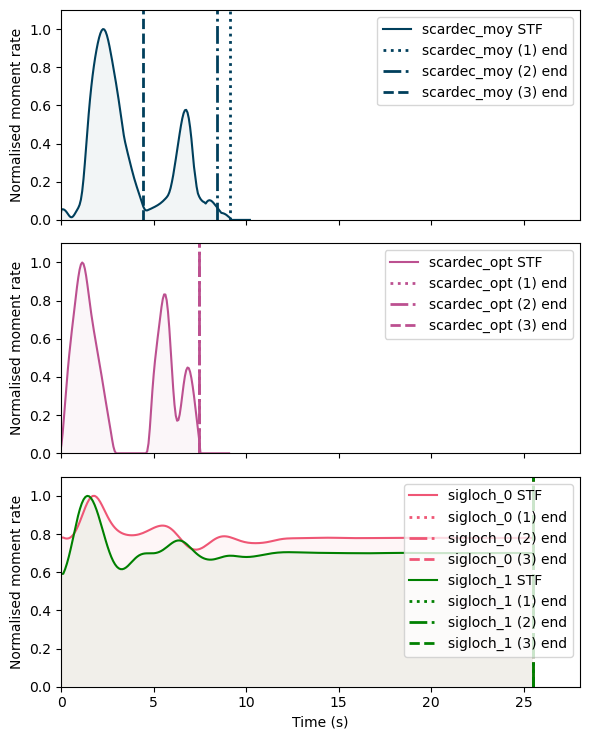

event                                       19990401_2136
scardec    FCTs_19990401_213621_NEW_BRITAIN_REGION__P.N.G
ye                                                      0
isc                                                     0
sigloch                                                 0
usgs                                                    0
mag                                                 6.113
Name: 948, dtype: object
1
[  0  14  15  16  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64 173 174 175 176 177]
1
17
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65 111 112 113 114 115 116 117 118 119 120]
17
13.21875


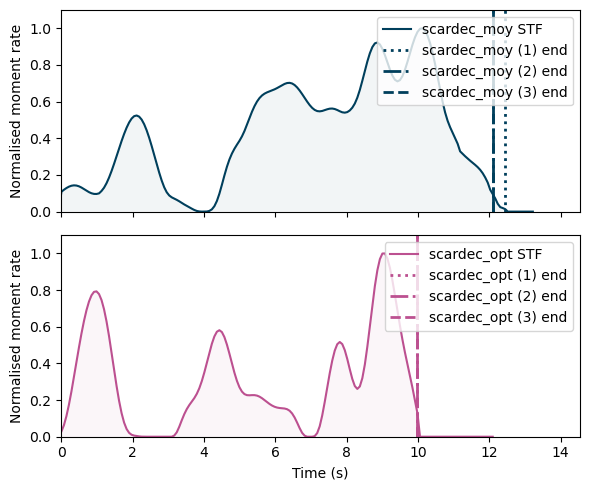

event                                  19941008_2144
scardec    FCTs_19941008_214407_HALMAHERA__INDONESIA
ye                                                 0
isc                                                0
sigloch                                            0
usgs                                               0
mag                                            6.949
Name: 958, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29 258 259 260 261 262 263
 264 265 274 275 276 277 278 279 280 281 282 283 356 357 358 359 360 361
 362 363 364 365 376 377 378 379 380 381 437 438 439 440 441 442 443 444
 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462
 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480
 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498
 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516
 517 518 519 520 5

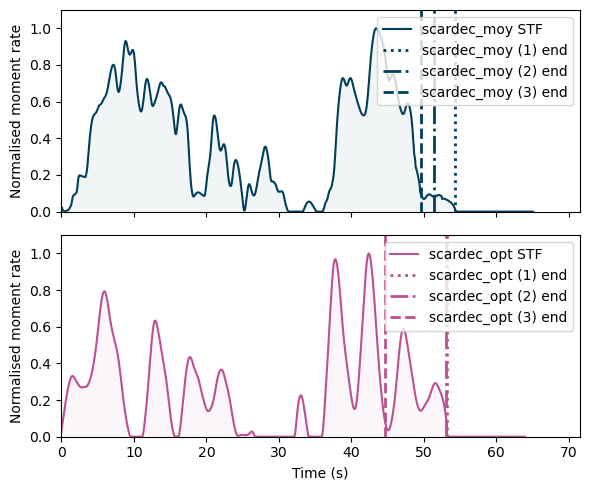

event                                  19960905_0814
scardec    FCTs_19960905_081414_EASTER_ISLAND_REGION
ye                                                 0
isc                                                0
sigloch                              0685.1996.249.b
usgs                                               0
mag                                           6.8945
Name: 963, dtype: object
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37 179 180 181 182 183 184 185 186 187 188 189 190 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331
 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349
 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367
 368 369 370 371 3

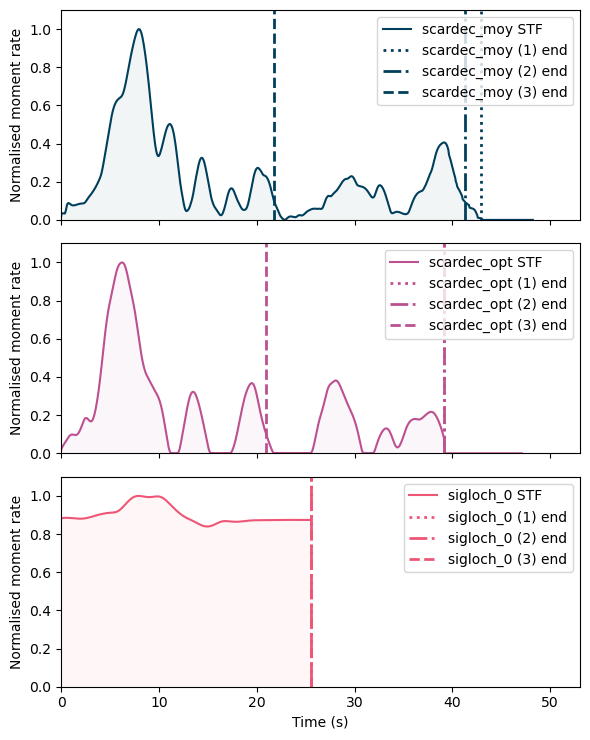

event                                 20110331_0011
scardec    FCTs_20110331_001158_FIJI_ISLANDS_REGION
ye                                                0
isc                                               0
sigloch                             0181.2011.090.a
usgs                                              0
mag                                           6.397
Name: 973, dtype: object
5
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 306 307 308 309 310
 311 312 313 314 315 316 

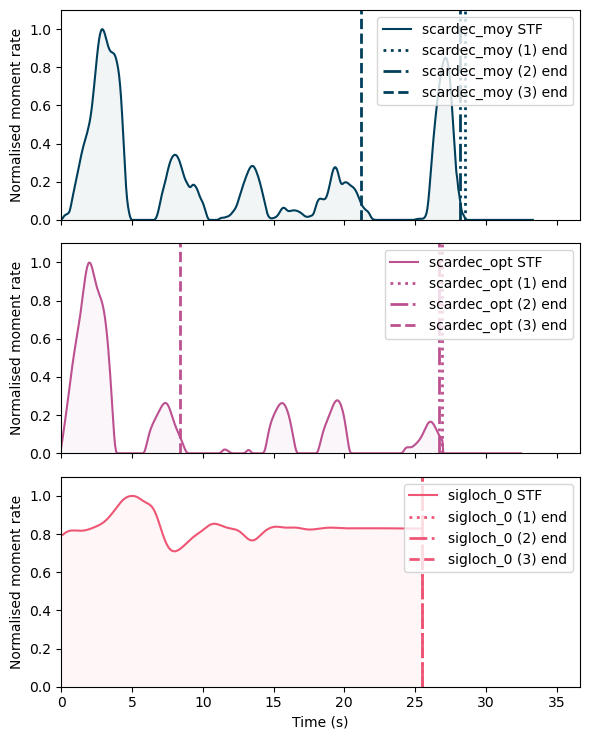

In [11]:
colors = ['#003f5c', '#bc5090', '#ef5675', 'g', 'c', 'm', 'k', 'y']
styles = ['--', '-.', ':', '--', '-.', ':', '--', '-.']
eventcount = 0
already_made = os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/figures/ends/all_on_one/both/')
for i, row in combined.iterrows():
    if row.event not in ['20111006_1112', '20150918_1559', '20030106_2343', '20050119_0611', '20220926_0959', '20210218_1530', '20210218_1530', '19950625_0210', '19930712_1317', '20050124_0416', '20210616_0443', '20210616_0443', '20140401_2346', '20141113_1024', '20181021_0140', '20071226_2204', '19970706_2013', '19970706_2013', '20190714_0910', '20190714_0910', '19920626_1132', '20151108_1647', '20021010_1050', '20021010_1050', '20190126_0812', '19970808_2227', '19970808_2227', '20101220_1841', '19950529_0729', '20020326_0345', '20110319_0122', '20060815_0305', '20060815_0305', '20030628_1529', '20010614_2331', '20141028_0315', '20141028_0315', '19920720_0746', '19970728_0646', '20080419_0312', '20010704_1747', '20150524_1438', '20150524_1438', '19961209_1128', '19961209_1128', '19940603_2106', '19940603_2106', '20181205_0418', '20110113_1616', '20110113_1616', '20030127_1756', '20060506_1826', '20060506_1826', '20000828_1505', '20140310_0518', '20140310_0518', '20160607_1915', '20020219_0035', '20020219_0035', '20110716_0703', '20140513_0635', '20070902_0105', '20070902_0105', '19950210_0145', '20130915_1621', '20181115_2002', '20150919_0506', '20131004_1726', '20131004_1726', '20131004_1726', '20120605_1931', '20080416_0554', '20050516_0354', '20040909_1633', '19990401_2136', '19941008_2144', '19941008_2144', '19960905_0814', '19960905_0814', '20110331_0011', '20130726_2132', '20180829_0351', '20180829_0351', '19940121_0224', '20121030_0249', '20121030_0249', '20140121_0129', '20070706_0109', '20061112_1821', '20060519_1444', '20040103_1623', '20040103_1623', '20120604_0315', '20120604_0315', '20081107_1604', '20081107_1604', '19940818_0442', '19940818_0442', '19950708_1715', '19950708_1715', '20220330_2056', '20220330_2056', '20210803_2033', '19961009_1310', '20010823_2145', '20010823_2145', '20220110_0006', '20200107_0824', '19950807_1944', '20111129_0030', '20030811_2122', '20030811_2122', '20040818_0903', '20100218_0113', '20140903_2033', '20140903_2033', '20130715_1403', '20120417_1903', '20120417_1903', '20101229_0654', '20101229_0654', '19920406_1354', '20080822_0747', '20050411_1220', '20100720_1719', '20100413_2349', '20090912_2006', '20090912_2006', '20160415_1411', '20160415_1411', '20080728_2137', '20020115_0712', '20050512_1115', '19981105_1805', '20090818_1750', '20001121_1733', '20210816_1110', '20210816_1110', '19950417_0114', '19950417_0114', '20140321_1341', '20140321_1341', '20030930_1408', '20060331_0117', '20110510_0855', '20110510_0855', '20130210_1839', '20130210_1839', '20140418_1427', '20001220_1649', '20081023_1004', '20170827_0417', '20170827_0417', '20081114_0205', '20130209_2102', '20130209_2102', '20090715_2010', '20020305_2116', '19981019_0125', '19990213_1445', '20001107_0018', '20001107_0018', '20050521_0511', '20050521_0511', '20040111_0432', '20010217_2011', '20140424_0310', '20001005_1339', '20060331_1321', '19950219_0403', '19950219_0403', '20060507_1417', '20040719_0801', '20110731_2338', '20130817_1632', '20120830_1343', '20100127_1742', '20100127_1742', '20060719_1057', '19950514_1133', '19950514_1133', '20080828_1237', '20011019_0328', '20000606_2116', '20031001_0103', '20110914_1810', '20161221_1643', '20080303_1349', '20160623_2105', '20010228_1230', '20110922_2307', '20060306_1813', '19981028_1625', '20190905_1502', '20120818_1531', '19990222_0100', '19980810_0952', '20050519_0154', '19930630_2347', '20040513_0958', '20140524_0925', '20031210_0438', '19950308_0345', '19920802_0550', '19920802_0550', '20131024_1925', '20050101_1908', '20101126_1736', '20080409_1113', '20000506_1344', '20000506_1344', '20081122_1601', '20070317_1742', '19940604_0057', '20110317_0248', '20081213_0845', '20150601_2011', '20050407_1943', '20170719_1216', '20130422_0116', '20120903_0649', '19960723_0332', '19960723_0332', '20081002_2328', '20081002_2328', '20121012_0031', '20121012_0031', '20100718_0556', '20000504_2036', '20000504_2036', '20211125_1204', '20211125_1204', '20011203_1132', '19940901_1515', '19980624_1044', '19980624_1044', '20030508_2022', '20200417_1630', '19930120_1731', '20120827_0437', '19940314_0430', '20210123_2336', '20041102_1002', '20021115_1958', '19970421_1202', '20110214_0340', '20191016_1137', '20071220_0755', '20080419_0558', '20080419_0558', '20050116_2017', '20120421_0116', '20050615_1952', '19921108_0343', '20000521_1958', '20110411_0816', '20120316_0758', '19990829_0046', '20130430_0625', '19991130_1623', '20000809_2255', '20170711_0700', '19920628_1157', '19920628_1157', '20141009_0214', '20000108_0119', '20000108_0119', '20181206_2326', '20061230_0830', '20061230_0830', '20040729_0144', '20040729_0144', '19930525_2316', '20090528_0824', '20090528_0824', '20130207_1859', '20130207_1859', '20181224_1241', '20110312_1253', '19920710_0931', '20150716_1516', '20150716_1516', '20070624_0025', '19941013_0504', '20110505_1458', '20061226_1234', '20150507_0710', '19990329_0617', '19990329_0617', '20161209_1910', '20161209_1910', '20040507_0126', '20051213_0316', '20051213_0316', '20000602_1113', '20150417_1552', '20031226_2126', '20160621_1626', '20040529_2056', '20171110_1201', '19970228_1257', '20060522_1112', '20170210_1403', '19931126_2320', '19931126_2320', '20140806_1145', '19950421_0517', '20100824_0211', '20150530_1718', '20120326_1812', '20110820_1713', '20140624_0315', '20140410_2327', '20080302_0511', '20060324_1746', '20080830_0830', '20120204_0740', '20100112_2200', '20100616_0358', '20020215_0146', '20140518_2347', '20010915_1504', '20120121_1847', '20060426_0146', '20080312_1136', '20110709_1354', '20150901_1525', '20050704_1136', '20121014_0458', '20130228_1807', '20090101_0627', '20140205_2052', '20000407_1908', '20110317_0413', '20110916_2136', '19991208_1334', '20110317_0803', '20110510_1024', '20101020_0409', '20180201_1105', '20100405_1005', '20121207_0831', '20110624_0633', '20140506_2052', '20080407_2254', '20131006_2133', '20161017_0714', '20080719_1101', '20100911_1143', '20010218_1304', '20070221_1105', '20120226_0521', '20040928_1715', '20091126_1908', '20110311_2011', '20080729_2056', '20111107_1651', '19960818_0716', '20090923_0259', '20100414_0125', '20110721_2301', '20110721_2301', '20130206_1103', '20151224_1944', '20120420_2314', '20131117_0904', '20051113_1025', '20080821_1224', '20121129_1110', '20120816_1324', '20050410_1724', '20090404_0719', '20140709_1758', '20080101_1913', '20080101_1913', '20141224_0158', '20050124_2323', '20100127_1849', '20100505_0938', '20101103_1118', '20130402_1613', '20151219_0210', '20151219_0210', '20111214_0048', '20111214_0048', '20150810_0424']:
        continue
    # if row.event != '20200623_1529':
    #     continue
    # if row.sigloch != '0706.2011.026.a':
    #     continue
    if i > 1000:
        continue
    # if row.event + '.png' in already_made:
    #     continue
    lines_count = 0
    count = 0
    print(row)
    sources = 0
    for r in row[1:-1]:
        if r not in [0, '0']:
            sources += 1
    if row['scardec'] not in ['0', 0]:
        sources += 1

    max_end = 0
    y_max = 0
    max_end = 0
    if sources < 4:
        fig, axs = plt.subplots(sources, 1, figsize=(6, 2.5*sources), sharex = True)
    else:
        fig, axs = plt.subplots(sources, 1, figsize=(6, 8), sharex = True)
    if sources == 1:
        axs = [axs]

    ends_different = False
    count_datasets = 0

    threshold = 0.7

    if row.scardec not in ['0', 0]:
        momentrate, time = functions_load_stf.get_scardec_stf(row['scardec'], wanted_type = 'fctmoy')
        axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, name = 'scardec_moy', threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        count += 1

        momentrate, time = functions_load_stf.get_scardec_stf(row['scardec'], wanted_type = 'fctopt')
        axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, name = 'scardec_opt', threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        count += 1

        count_datasets += 1
    if row.ye not in ['0', 0]:
        momentrate, time = functions_load_stf.get_ye_stf(row['ye'])
        axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, name = 'ye', threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        count += 1
        count_datasets += 1
    if row.usgs not in ['0', 0]:
        momentrate, time = functions_load_stf.get_usgs_stf(row['usgs'])
        axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, name = 'usgs', threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        count += 1
        count_datasets += 1
    if row.isc not in ['0', 0]:
        momentrate, time = functions_load_stf.load_isc(row['isc'])
        axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, name = 'isc', threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
        lines_count += 1
        count += 1
        count_datasets += 1

    if row.sigloch not in ['0', 0]:
        momentrate_list, time_list = functions_load_stf.get_sigloch_stf(row['sigloch'])
        sigloch_count = 0
        for momentrate, time in zip(momentrate_list, time_list):
            momentrate = np.array(momentrate)
            y_max = max(y_max, 10**max(momentrate))
            time = np.arange(0, 25.6, 0.1)#np.array(time)
            axs[count], max_end, y_max = end_plot_norm(axs[count], momentrate, time, name = f'sigloch_{sigloch_count}', threshold = threshold, max_end = max_end, y_max = y_max, count = count, lines_count = lines_count)
            lines_count += 1
            sigloch_count += 1
        count_datasets += 1
        count += 1

    for ax in axs:
        ax.set_xlim(0, 1.1*max_end)
        ax.set_ylim(0, 1.1)#*y_max)
        ax.legend(loc='upper right')
        ax.set_ylabel('Normalised moment rate')
    axs[-1].set_xlabel('Time (s)')

    plt.tight_layout()

    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/ends/for_paper/70_threshold/{row.event}_norm.png', bbox_inches='tight')

    print(max_end)
    plt.show()




